In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
cloud_df=pd.read_csv("cloudpredictionsystemproject.csv")

In [3]:
cloud_df.head(5)

,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
numeric_data=[feature for feature in cloud_df if cloud_df[feature].dtype!='O']
categoric_data=[feature for feature in cloud_df if feature not in numeric_data]

#try to fill the missing values in the dataset
#then see the outliers of dataframe using boxplot    would be better

In [5]:
print("numeric_data   : {}".format(len(numeric_data)))

numeric_data   : 16


In [6]:
print("categoric_data  :{}".format(len(categoric_data)))

categoric_data  :7


In [7]:
print(numeric_data)

['MinimumTemperature', 'MaximumTemperature', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temperature9am', 'Temperature3pm']


In [8]:
print(categoric_data)

['Date', 'Location', 'WindGustDirection', 'WindDirection9am', 'WindDirection3pm', 'CloudBurst Today', 'CloudBurstTomorrow']


In [9]:
missingvalues=cloud_df.isnull().sum()*100/len(cloud_df)

In [10]:
missingvalues

Date                   0.000000
Location               0.000000
MinimumTemperature     1.020899
MaximumTemperature     0.866905
Rainfall               2.241853
Evaporation           43.166506
Sunshine              48.009762
WindGustDirection      7.098859
WindGustSpeed          7.055548
WindDirection9am       7.263853
WindDirection3pm       2.906641
WindSpeed9am           1.214767
WindSpeed3pm           2.105046
Humidity9am            1.824557
Humidity3pm            3.098446
Pressure9am           10.356799
Pressure3pm           10.331363
Cloud9am              38.421559
Cloud3pm              40.807095
Temperature9am         1.214767
Temperature3pm         2.481094
CloudBurst Today       2.241853
CloudBurstTomorrow     2.245978
dtype: float64

In [11]:
def imputevalue(cloud_df,var):
        random_sample = cloud_df[var].dropna().sample(cloud_df[var].isnull().sum(), random_state=0)
        random_sample.index = cloud_df[cloud_df[var].isnull()].index
        cloud_df.loc[cloud_df[var].isnull(), var] = random_sample



In [12]:
imputevalue(cloud_df,"Evaporation")
imputevalue(cloud_df,"Sunshine")
imputevalue(cloud_df,"Cloud9am")
imputevalue(cloud_df,"Cloud3pm")


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
continuous_data=[feature for feature in numeric_data if len(cloud_df[feature].unique())>25]

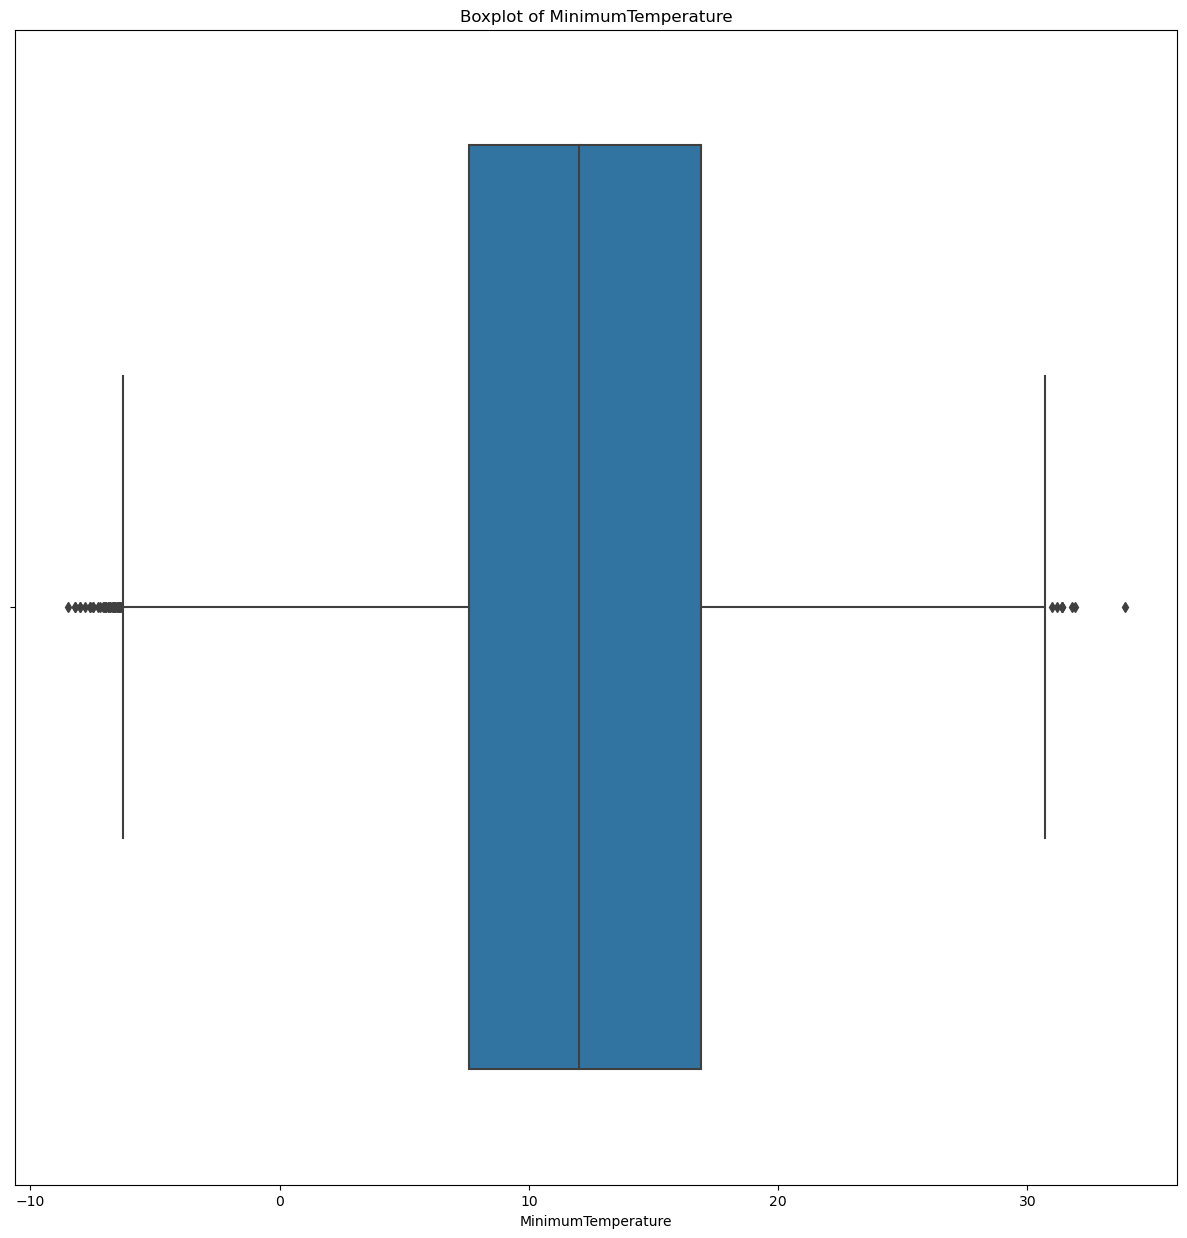

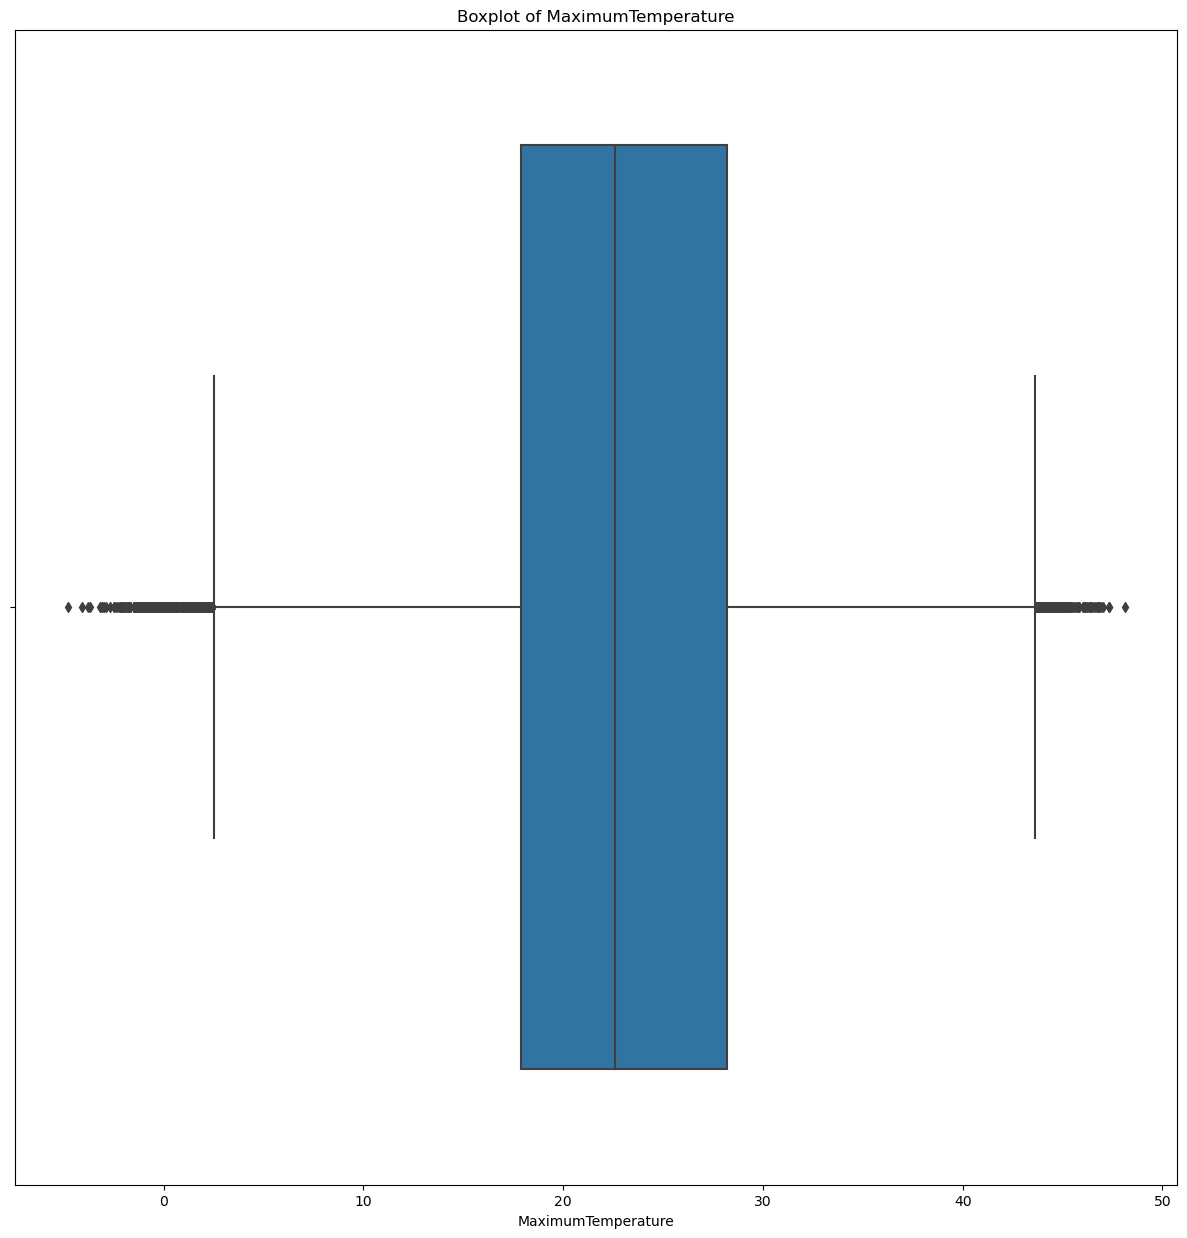

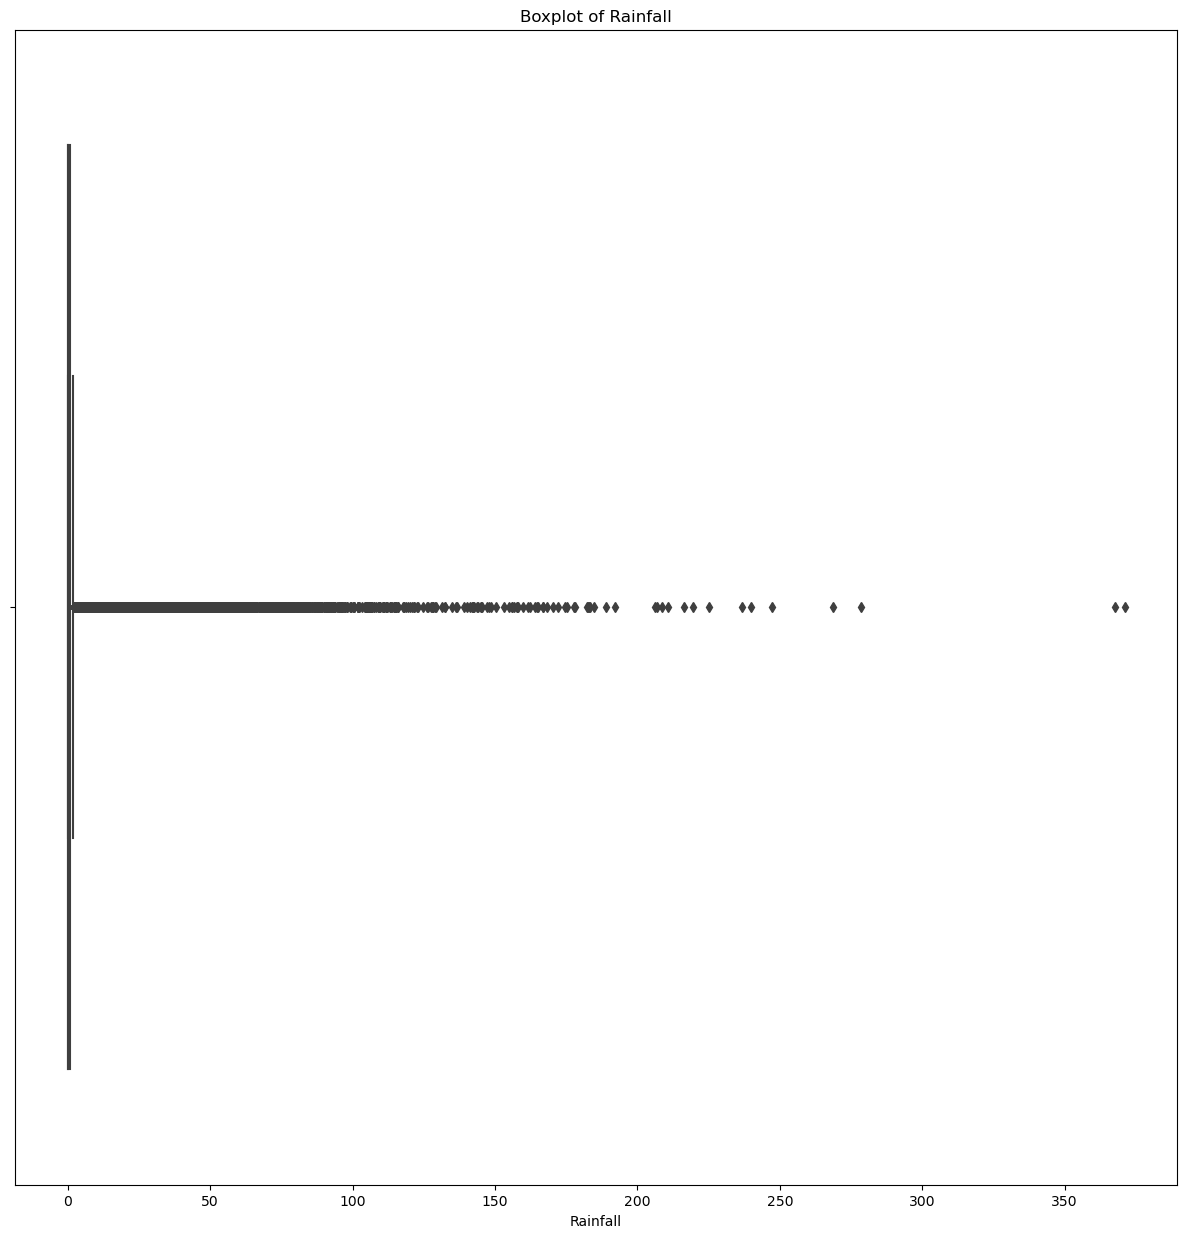

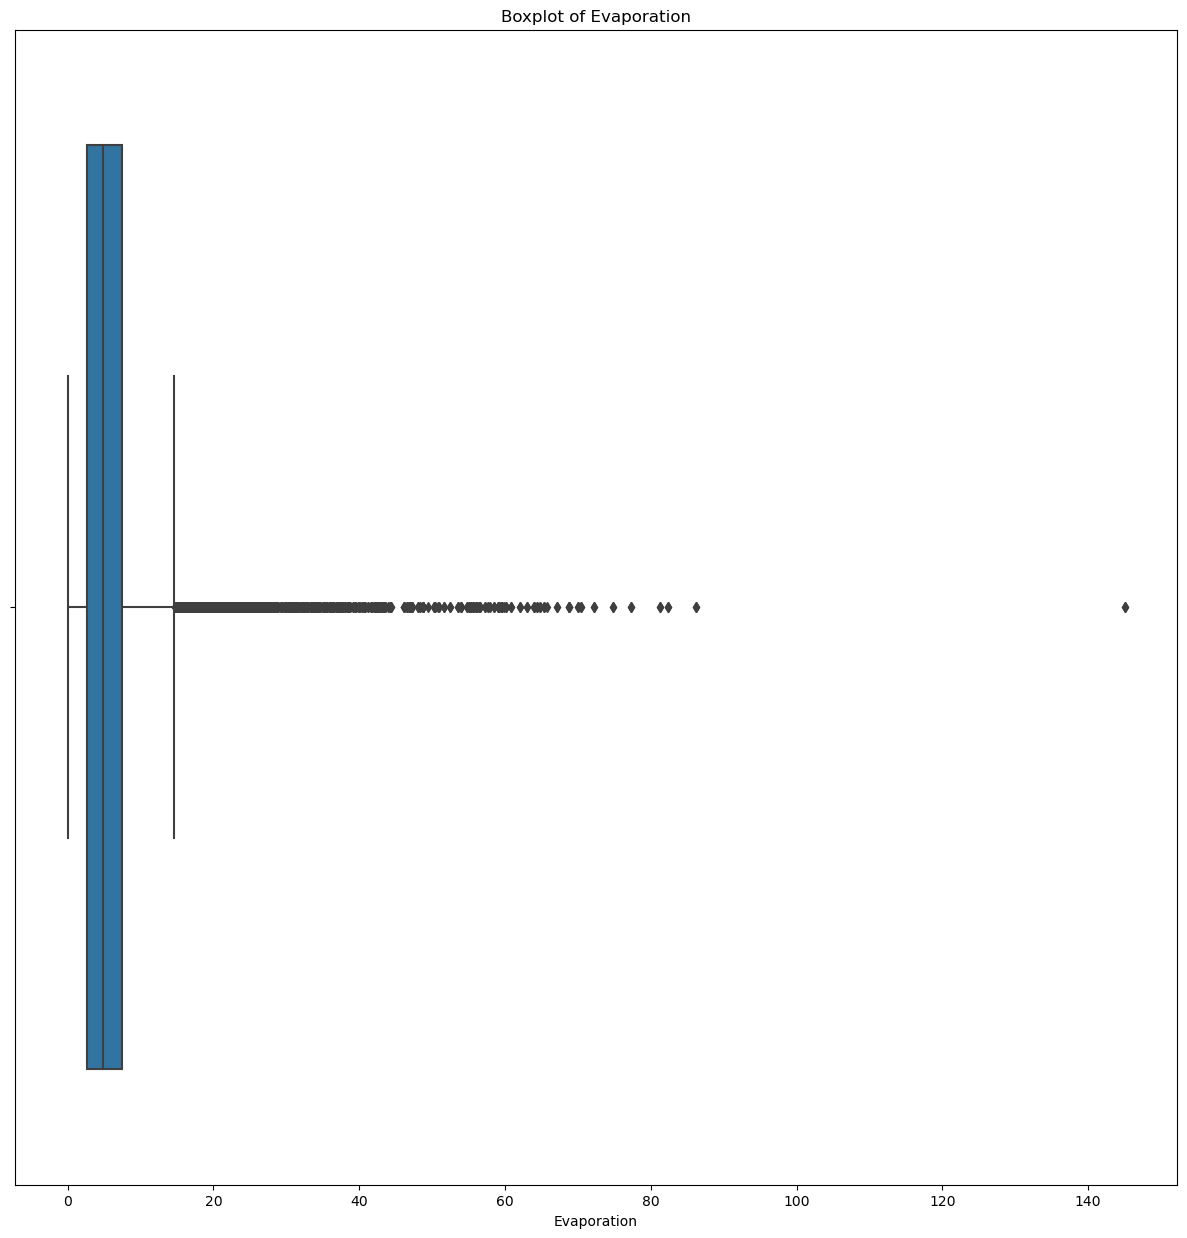

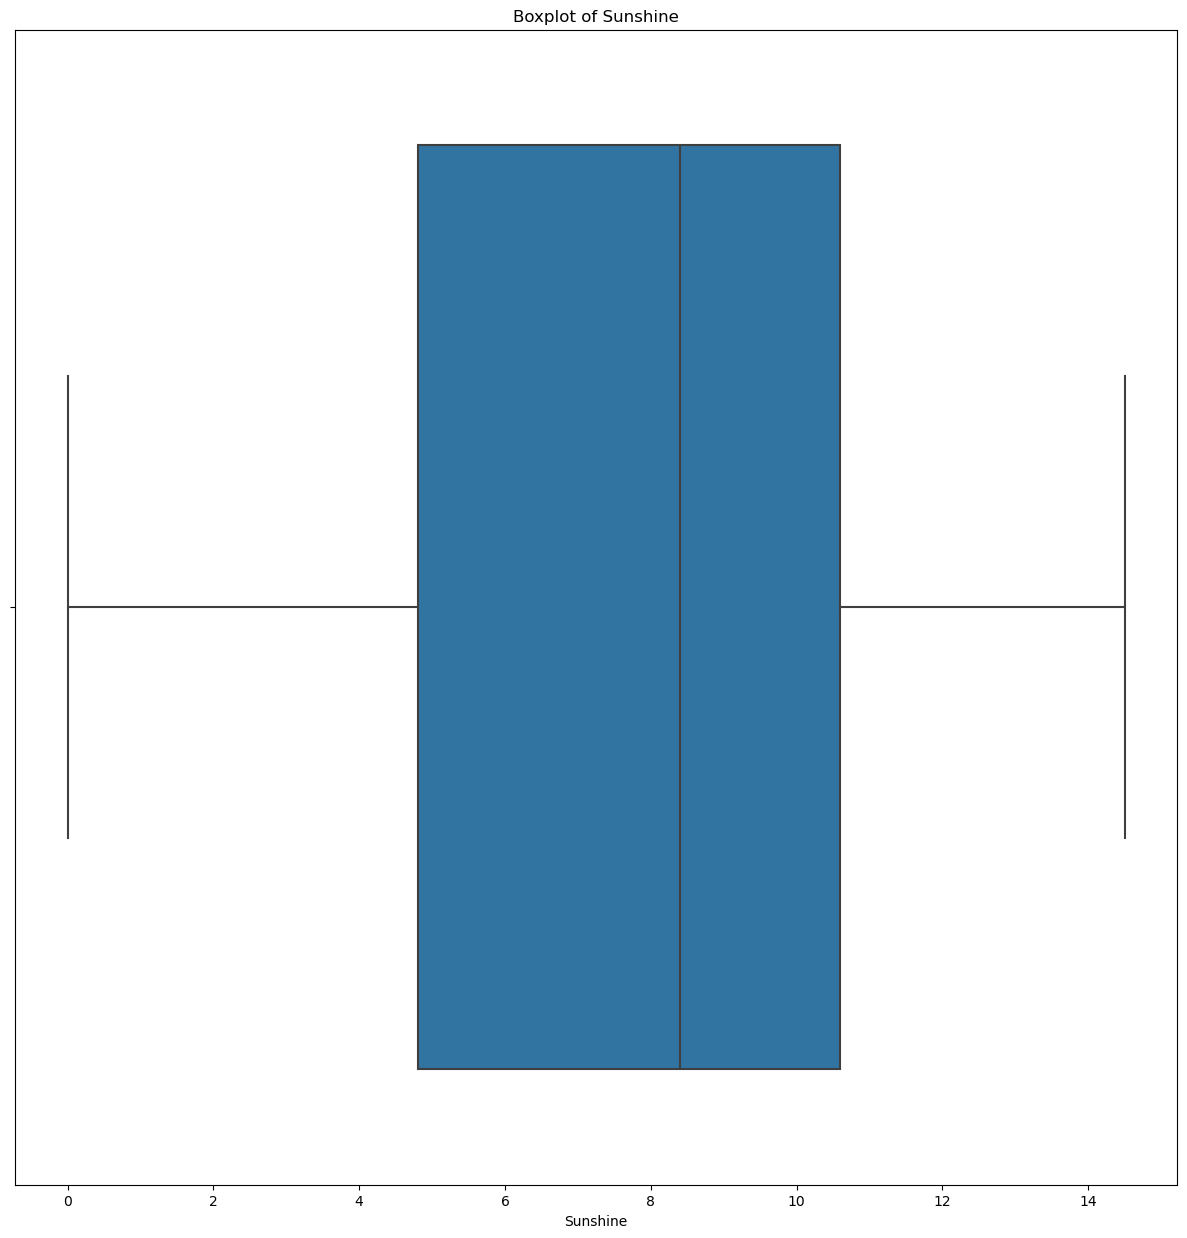

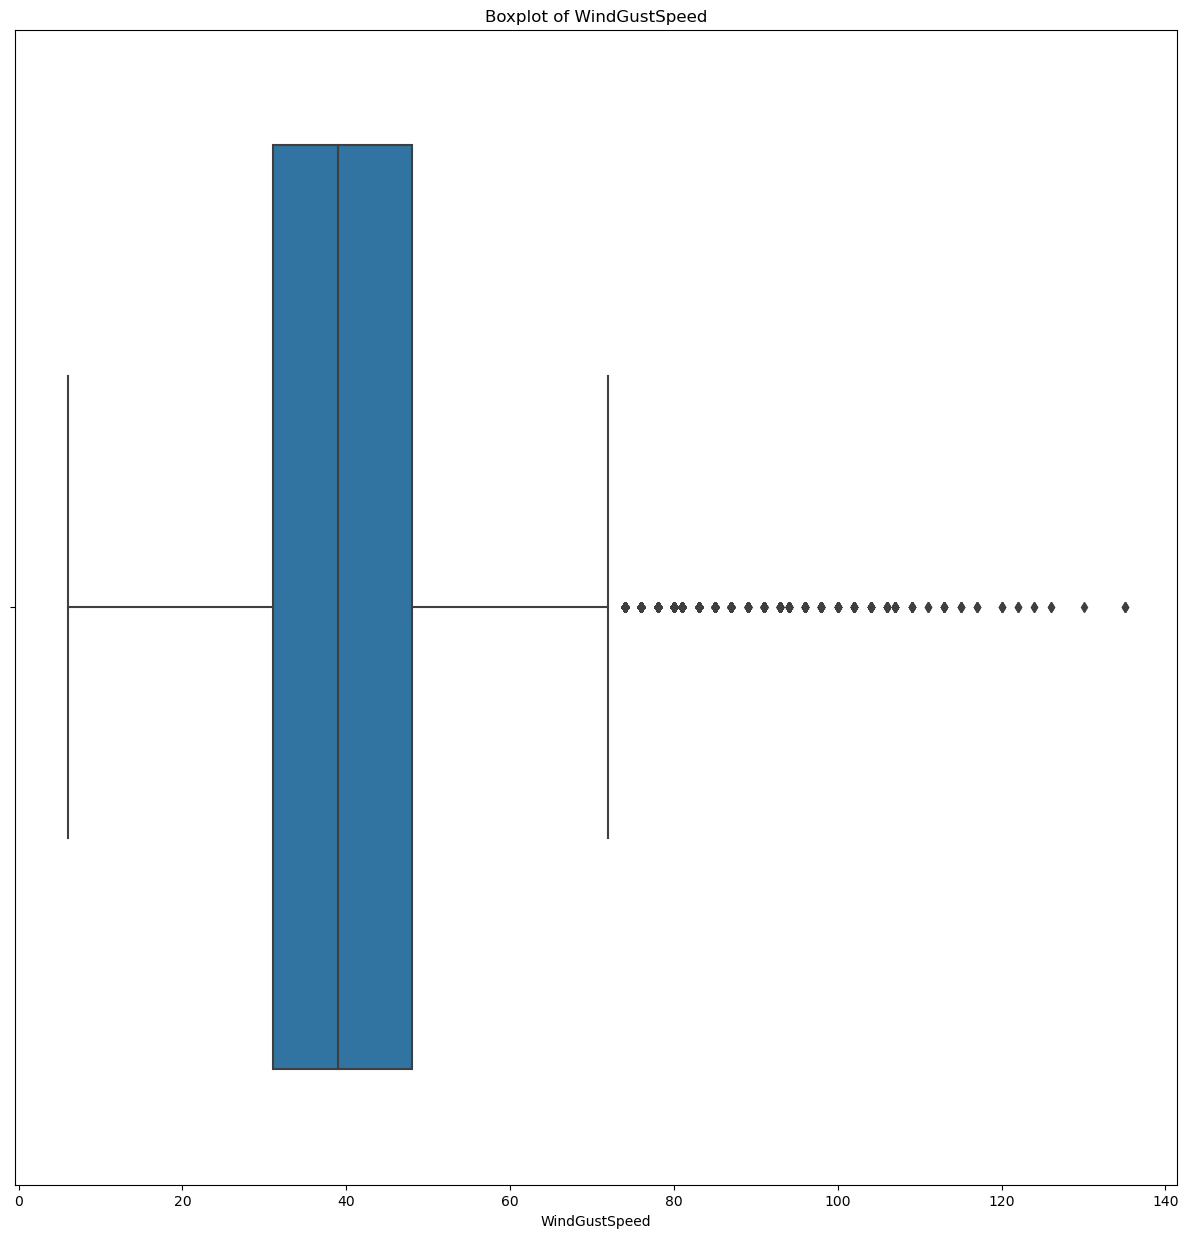

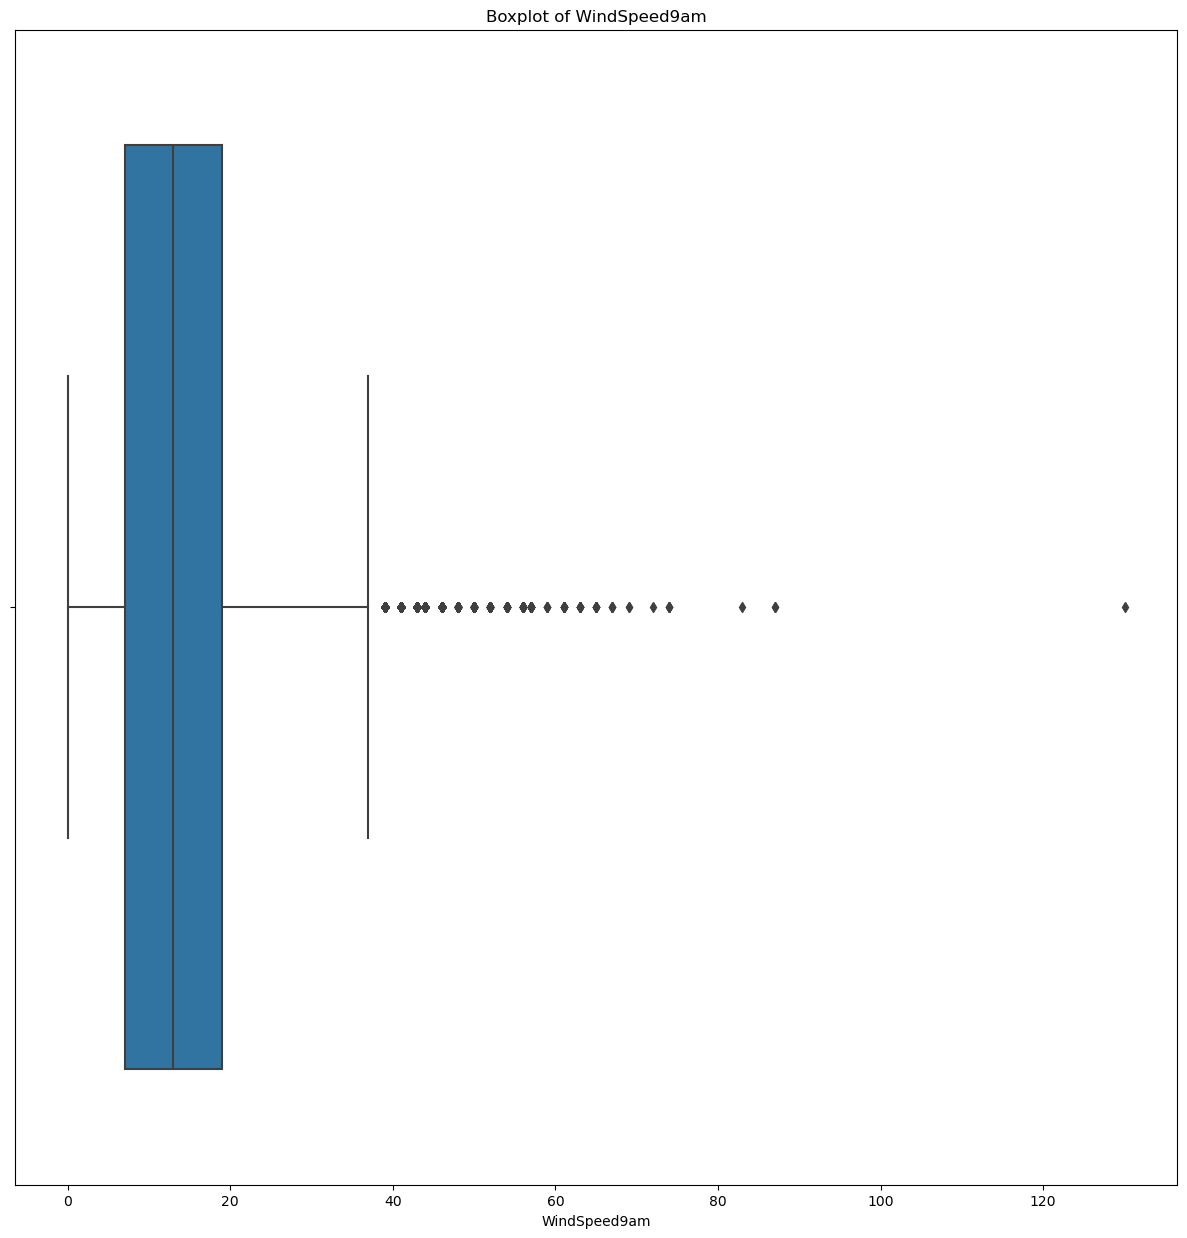

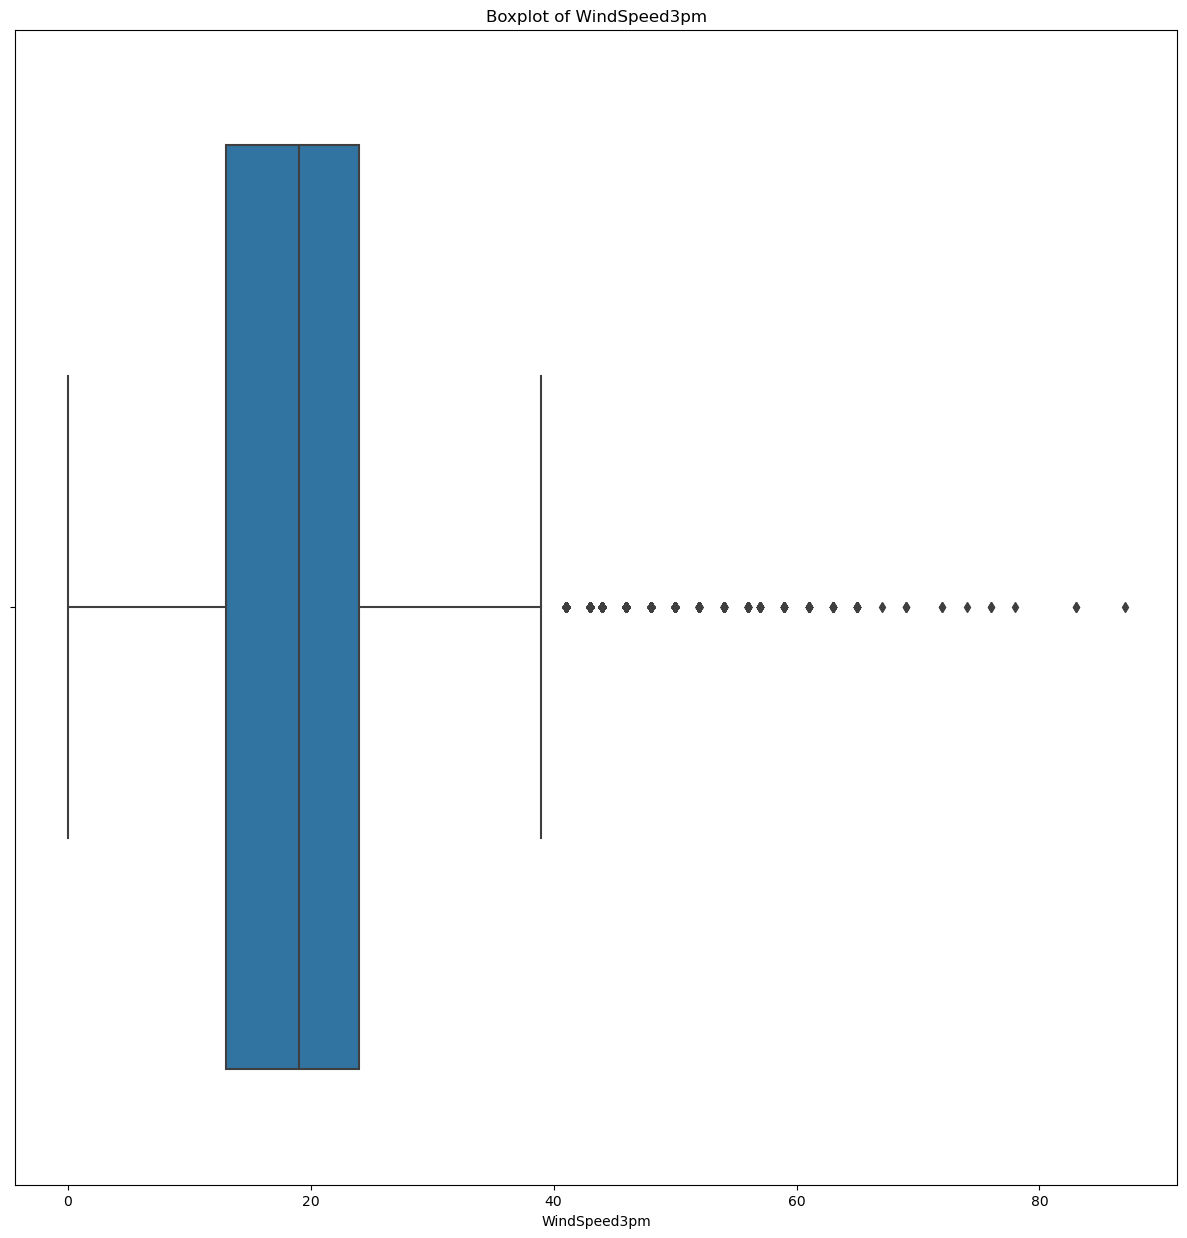

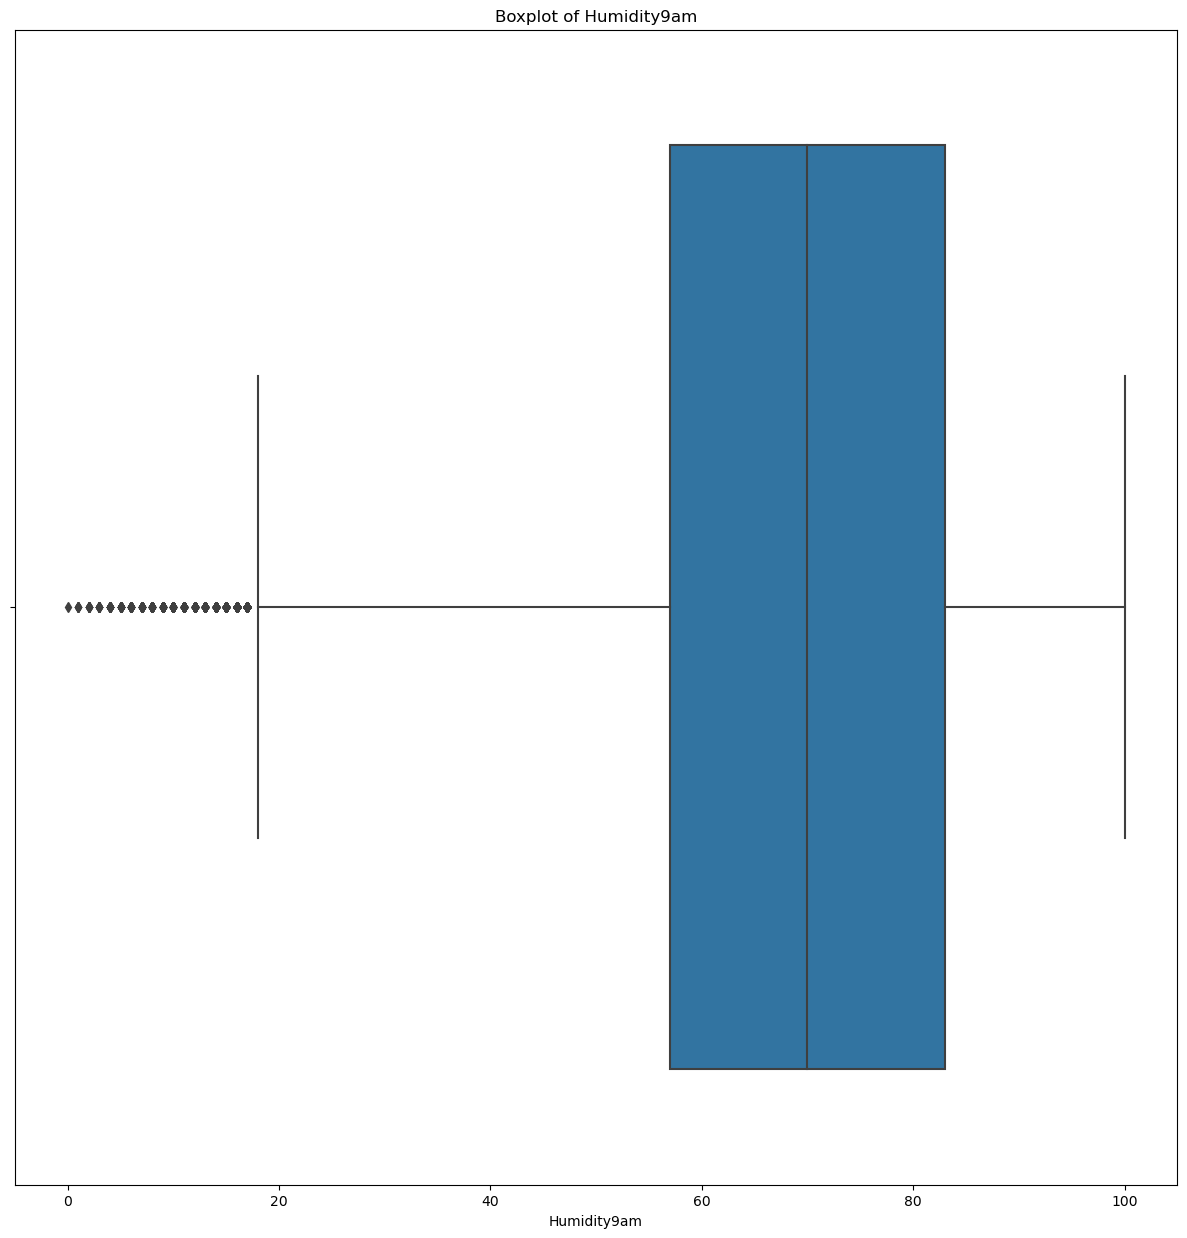

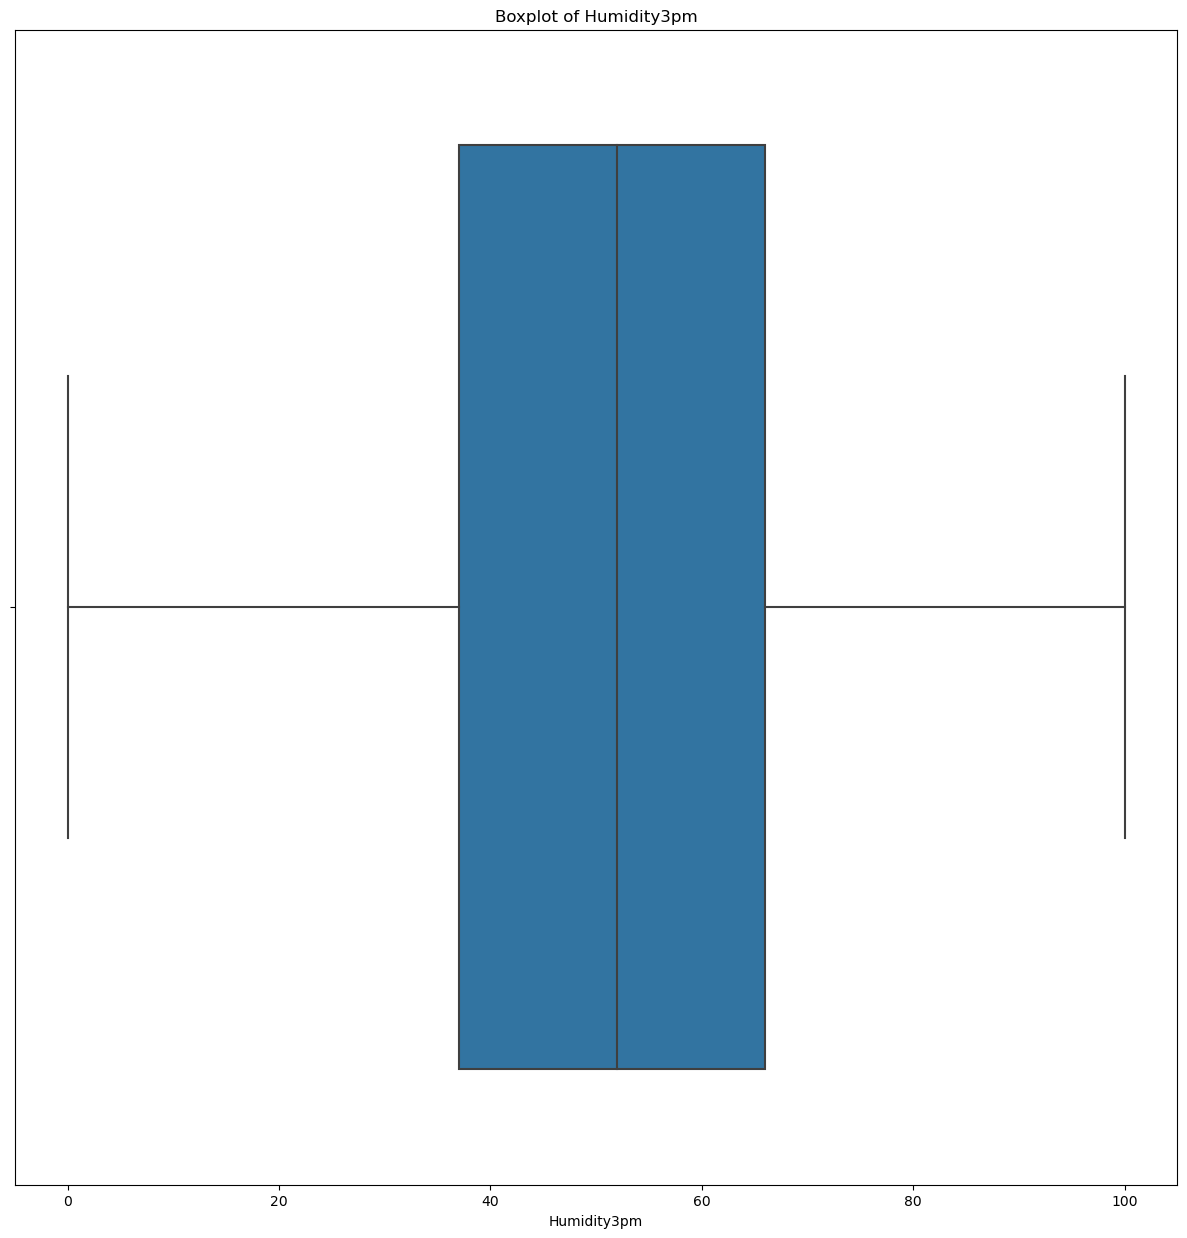

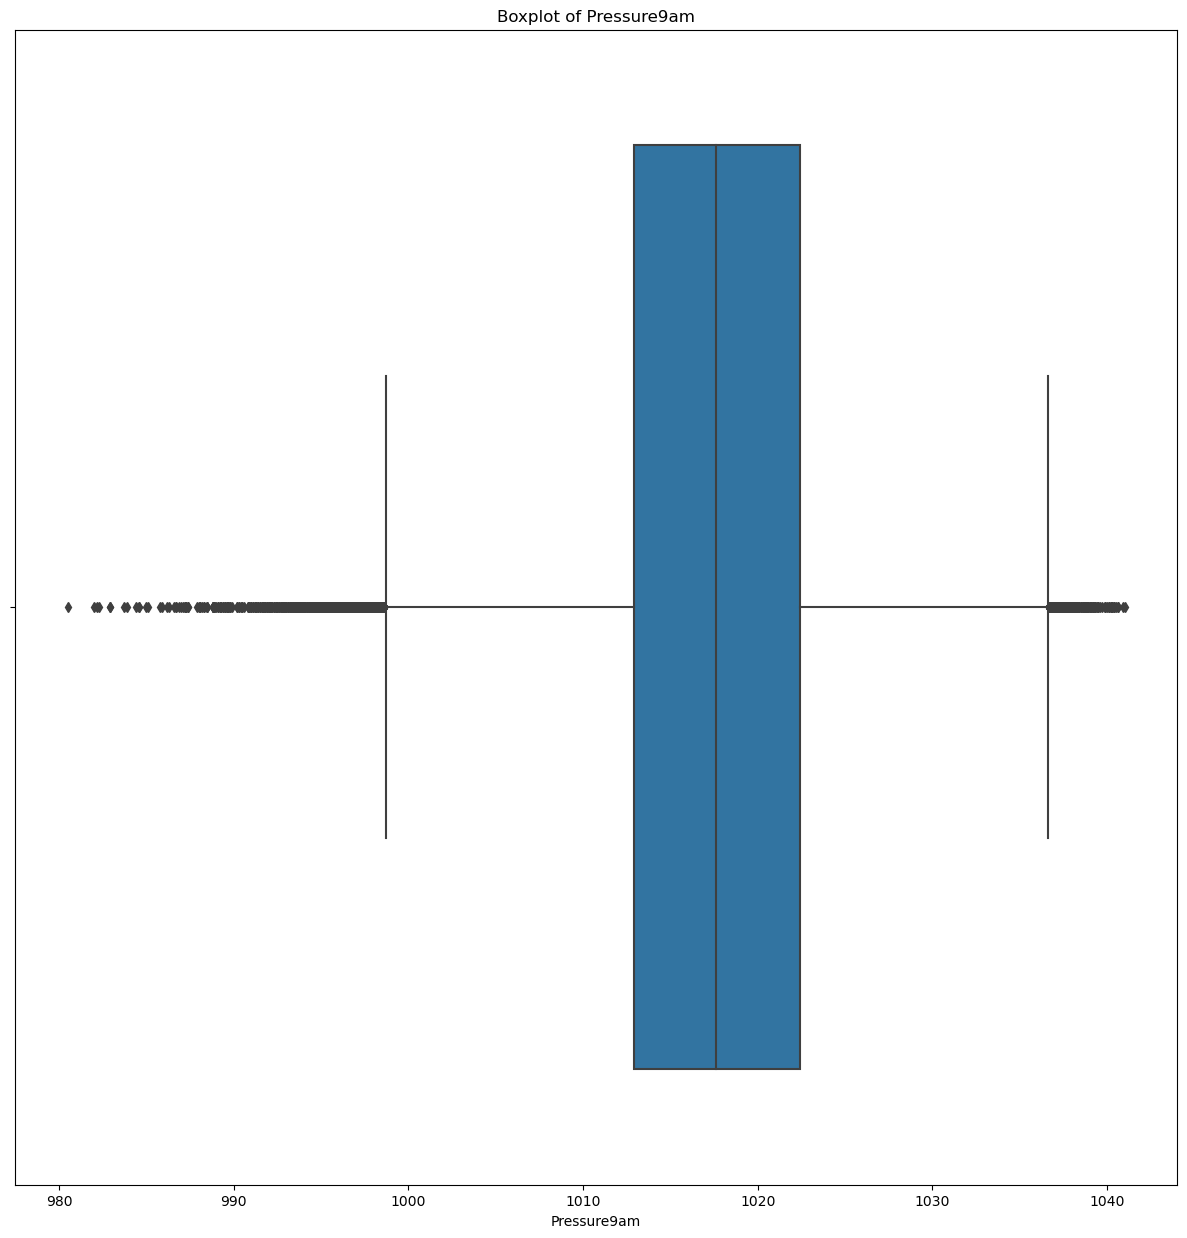

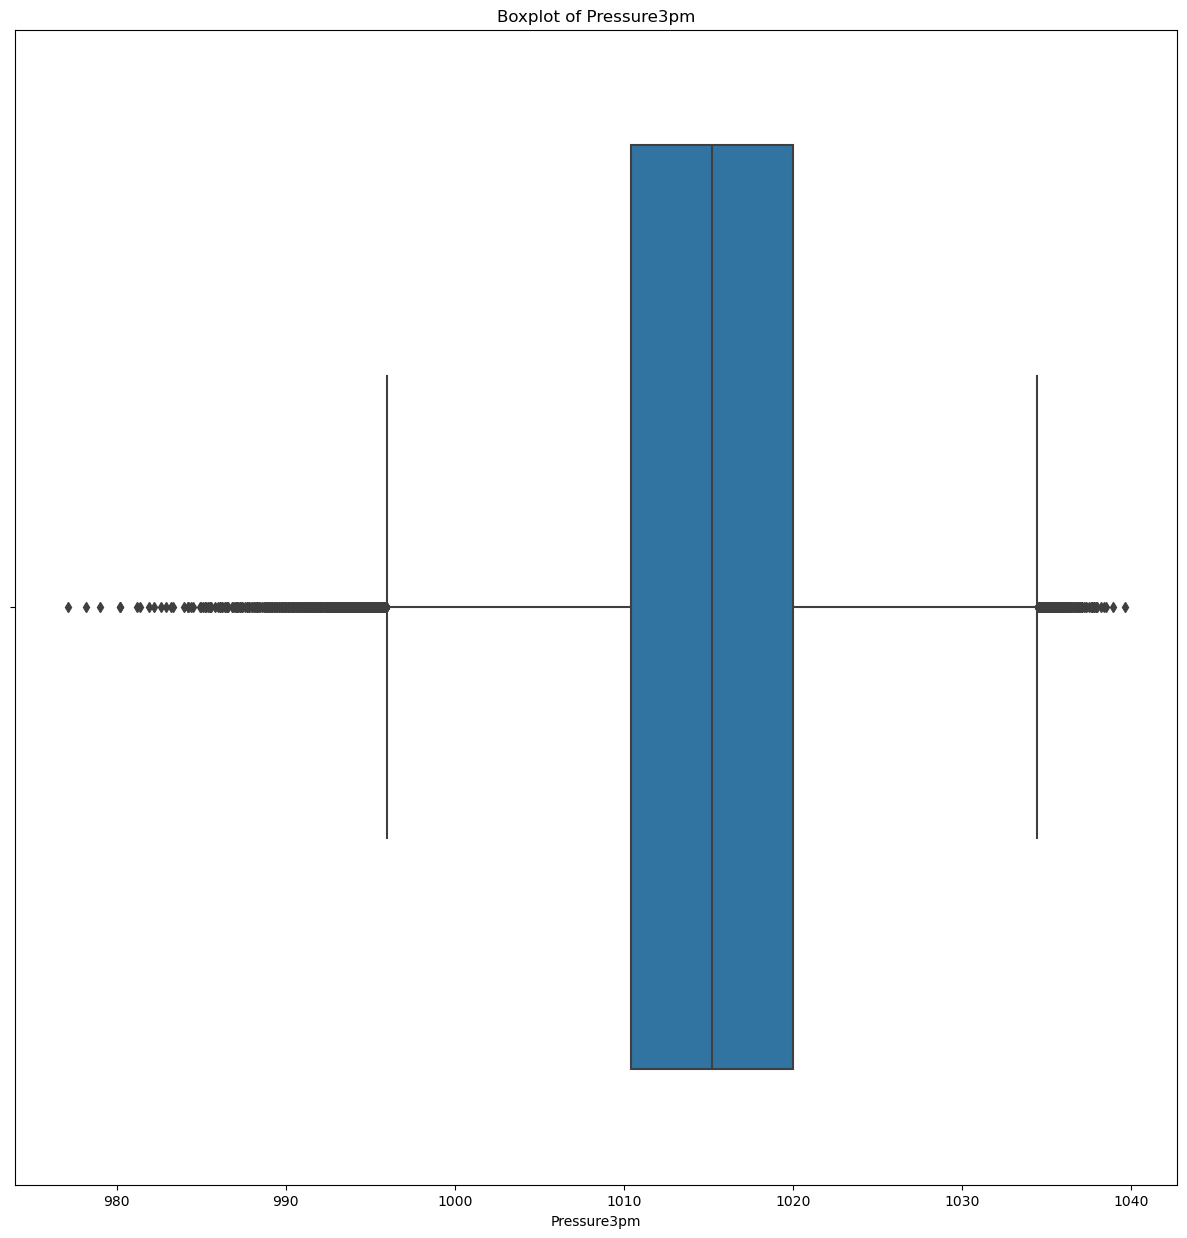

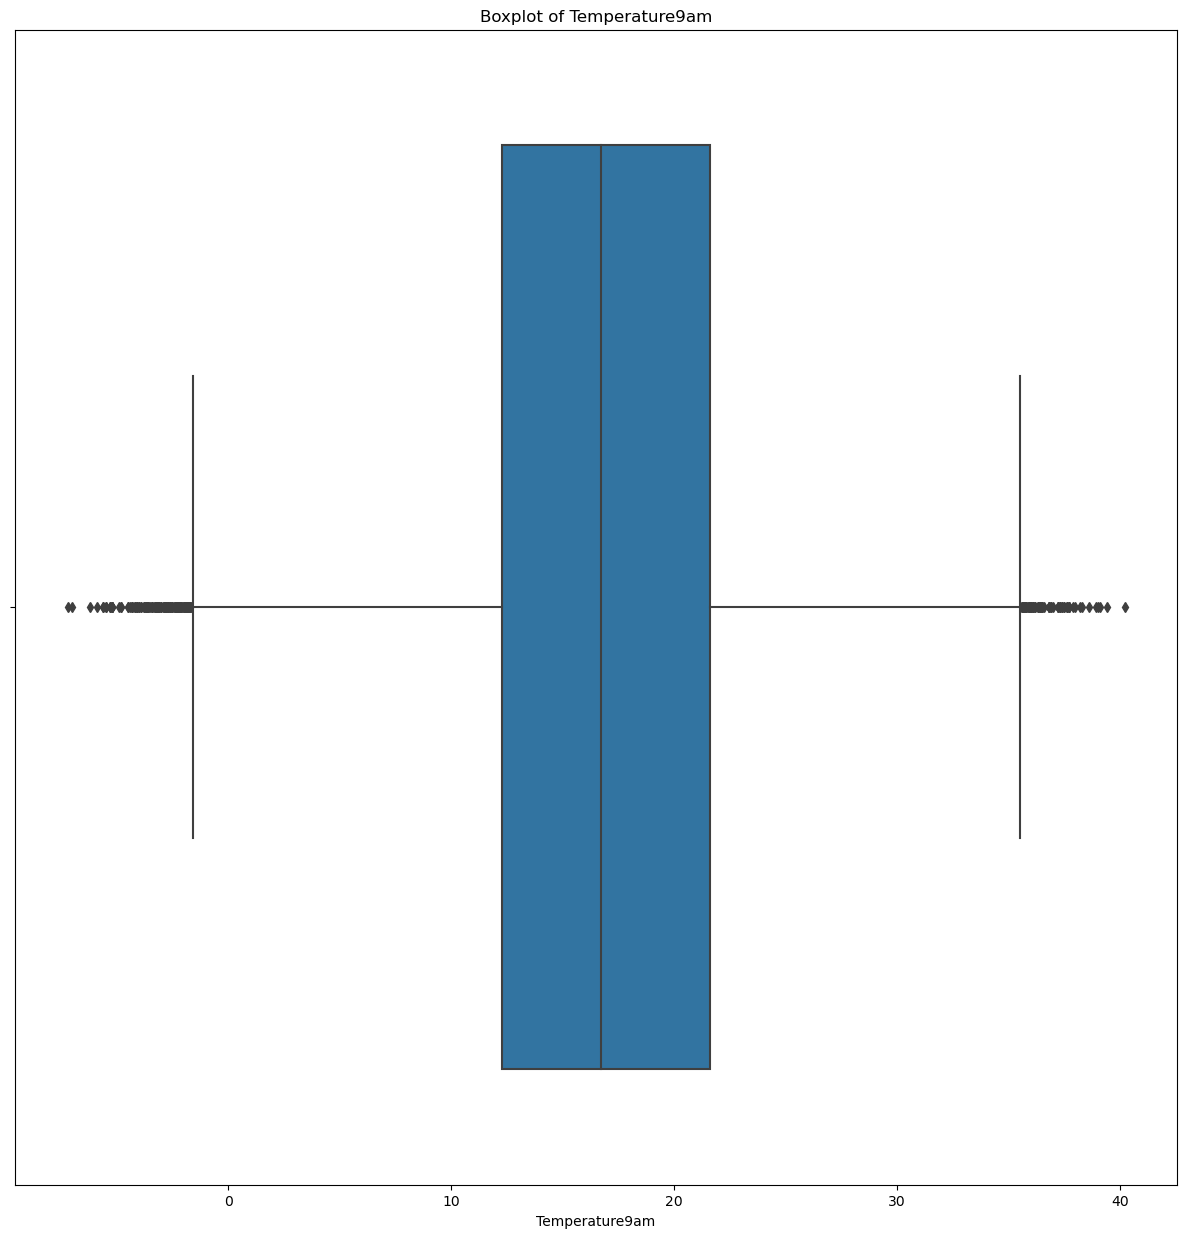

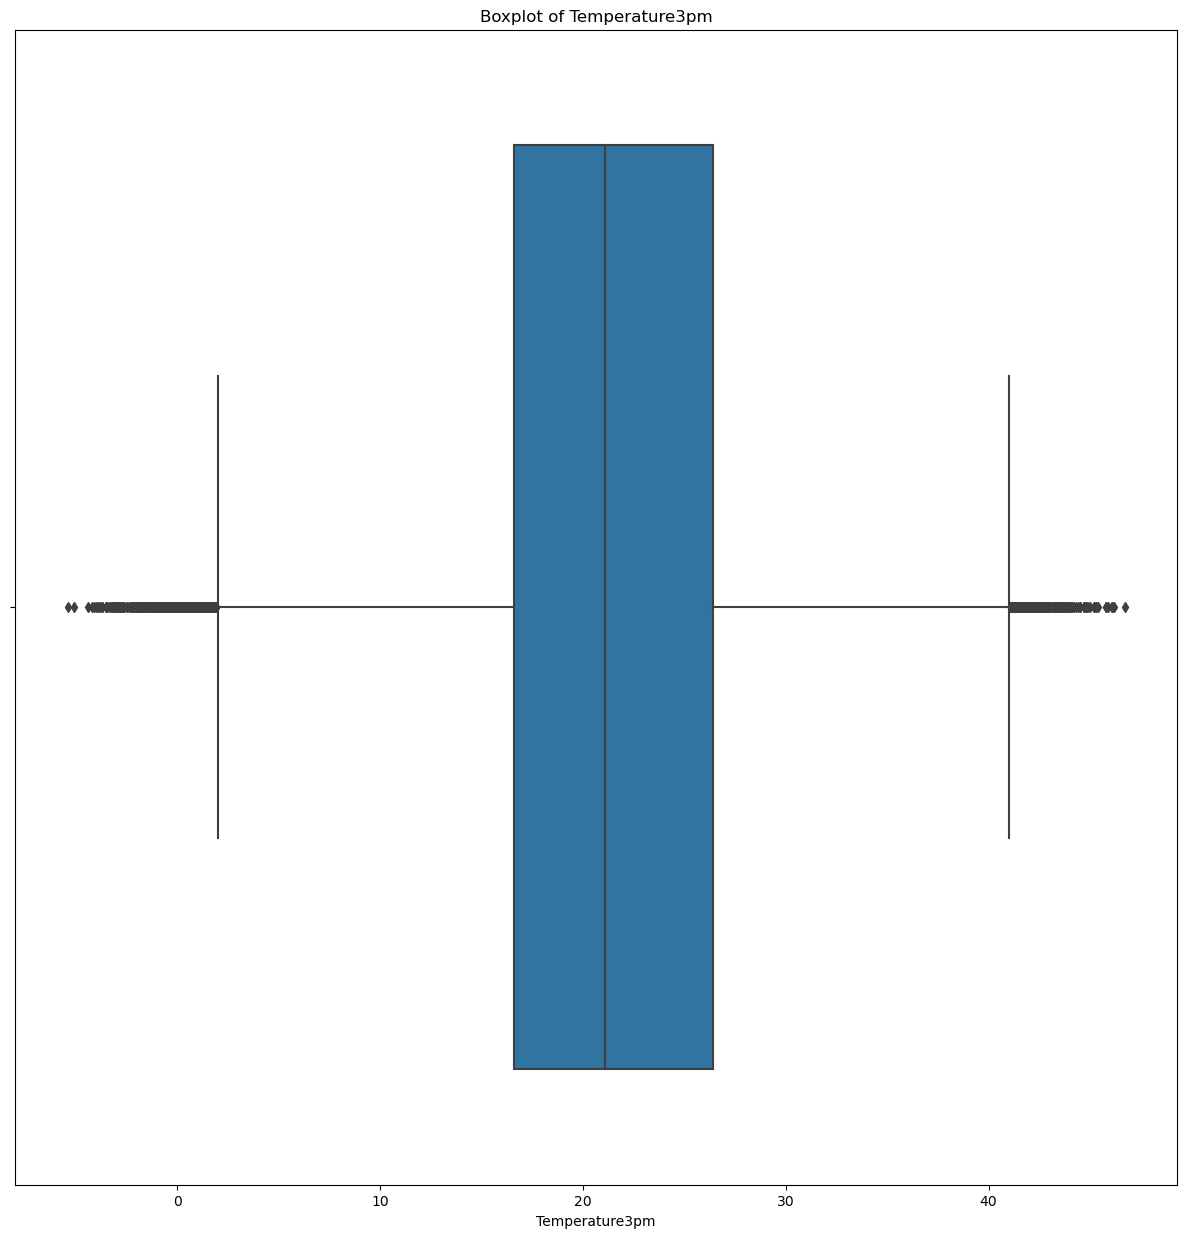

In [15]:
#datavar=cloud_df.copy()
  #  for i in datavar.columns:
 #       if i in continuous_data:
  #          plt.figure(figsize=(20,20))
   #         sns.boxplot(datavar=datavar,x=i)
   #         plt.title('Boxplot of {i}')
   #         plt.show()
data=cloud_df.copy()
for i in continuous_data:
    plt.figure(figsize=(15, 15))  # Set the figure size
    sns.boxplot(data=data, x=i)  # Create the boxplot
    plt.title(f'Boxplot of {i}')  # Add a title
    plt.show()  

In [16]:
cloud_df['Date'] = pd.to_datetime(cloud_df['Date'])
cloud_df['Date'] = pd.to_datetime(cloud_df['Date'], format='%Y-%m-%d')



C:\Users\AKSHAT\AppData\Local\Temp\ipykernel_20988\2780241987.py:1: UserWarning: Parsing '13-12-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cloud_df['Date'] = pd.to_datetime(cloud_df['Date'])
C:\Users\AKSHAT\AppData\Local\Temp\ipykernel_20988\2780241987.py:1: UserWarning: Parsing '14-12-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cloud_df['Date'] = pd.to_datetime(cloud_df['Date'])
C:\Users\AKSHAT\AppData\Local\Temp\ipykernel_20988\2780241987.py:1: UserWarning: Parsing '15-12-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cloud_df['Date'] = pd.to_datetime(cloud_df['Date'])
C:\Users\AKSHAT\AppData\Local\Temp\ipykernel_20988\2780241987.py:1: UserWarning: Parsing '16-12-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cloud_df['Date'] = pd.to_datetim

In [17]:
cloud_df.isnull().sum()*100/len(cloud_df)


Date                   0.000000
Location               0.000000
MinimumTemperature     1.020899
MaximumTemperature     0.866905
Rainfall               2.241853
Evaporation            0.000000
Sunshine               0.000000
WindGustDirection      7.098859
WindGustSpeed          7.055548
WindDirection9am       7.263853
WindDirection3pm       2.906641
WindSpeed9am           1.214767
WindSpeed3pm           2.105046
Humidity9am            1.824557
Humidity3pm            3.098446
Pressure9am           10.356799
Pressure3pm           10.331363
Cloud9am               0.000000
Cloud3pm               0.000000
Temperature9am         1.214767
Temperature3pm         2.481094
CloudBurst Today       2.241853
CloudBurstTomorrow     2.245978
dtype: float64

In [18]:
#for feature in continuous_data:
   # if(cloud_df[feature].isnull().sum()*100/len(cloud_df))>0:
        #cloud_df[feature] = cloud_df[feature].fillna(cloud_df[feature].median())

In [19]:
cloud_df

,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow
0,2008-01-12,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-02-12,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-03-12,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-04-12,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-05-12,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [20]:
cloud_df

,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow
0,2008-01-12,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-02-12,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-03-12,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-04-12,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-05-12,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [21]:
for feature in continuous_data:
    if(cloud_df[feature].isnull().sum()*100/len(cloud_df))>0:
        cloud_df[feature] = cloud_df[feature].fillna(cloud_df[feature].median())

In [22]:
cloud_df.isnull().sum()*100/len(cloud_df)

Date                  0.000000
Location              0.000000
MinimumTemperature    0.000000
MaximumTemperature    0.000000
Rainfall              0.000000
Evaporation           0.000000
Sunshine              0.000000
WindGustDirection     7.098859
WindGustSpeed         0.000000
WindDirection9am      7.263853
WindDirection3pm      2.906641
WindSpeed9am          0.000000
WindSpeed3pm          0.000000
Humidity9am           0.000000
Humidity3pm           0.000000
Pressure9am           0.000000
Pressure3pm           0.000000
Cloud9am              0.000000
Cloud3pm              0.000000
Temperature9am        0.000000
Temperature3pm        0.000000
CloudBurst Today      2.241853
CloudBurstTomorrow    2.245978
dtype: float64

In [23]:
cloud_df["CloudBurst Today"] = pd.get_dummies(cloud_df["CloudBurst Today"], drop_first = True)
cloud_df["CloudBurstTomorrow"] = pd.get_dummies(cloud_df["CloudBurstTomorrow"], drop_first = True)
cloud_df

,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow
0,2008-01-12,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-02-12,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-03-12,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-04-12,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-05-12,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [24]:
df1 = cloud_df.groupby(["Location"])["CloudBurstTomorrow"].value_counts().sort_values().unstack()

In [25]:
df1

CloudBurstTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [26]:
df1[1].sort_values(ascending = False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [27]:
for feature in categoric_data:
    print(feature, (cloud_df.groupby([feature])["CloudBurstTomorrow"].mean().sort_values(ascending = False)).index)

Date DatetimeIndex(['2007-01-11', '2007-11-22', '2007-12-15', '2007-12-16',
               '2007-12-19', '2007-12-20', '2007-12-21', '2007-12-22',
               '2007-12-24', '2008-02-28',
               ...
               '2008-02-15', '2008-08-01', '2008-02-14', '2014-07-11',
               '2008-02-10', '2008-11-08', '2008-02-09', '2008-02-08',
               '2008-02-05', '2008-04-28'],
              dtype='datetime64[ns]', name='Date', length=3436, freq=None)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
      

In [28]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
cloud_df["WindGustDirection"] = cloud_df["WindGustDirection"].map(windgustdir)
cloud_df["WindDirection9am"] = cloud_df["WindDirection9am"].map(winddir9am)
cloud_df["WindDirection3pm"] = cloud_df["WindDirection3pm"].map(winddir3pm)

In [29]:
cloud_df.isnull().sum()*100/len(cloud_df)

Date                  0.000000
Location              0.000000
MinimumTemperature    0.000000
MaximumTemperature    0.000000
Rainfall              0.000000
Evaporation           0.000000
Sunshine              0.000000
WindGustDirection     7.098859
WindGustSpeed         0.000000
WindDirection9am      7.263853
WindDirection3pm      2.906641
WindSpeed9am          0.000000
WindSpeed3pm          0.000000
Humidity9am           0.000000
Humidity3pm           0.000000
Pressure9am           0.000000
Pressure3pm           0.000000
Cloud9am              0.000000
Cloud3pm              0.000000
Temperature9am        0.000000
Temperature3pm        0.000000
CloudBurst Today      0.000000
CloudBurstTomorrow    0.000000
dtype: float64

In [31]:
cloud_df["WindGustDirection"] = cloud_df["WindGustDirection"].fillna(cloud_df["WindGustDirection"].value_counts().index[0])
cloud_df["WindDirection9am"] = cloud_df["WindDirection9am"].fillna(cloud_df["WindDirection9am"].value_counts().index[0])
cloud_df["WindDirection3pm"] = cloud_df["WindDirection3pm"].fillna(cloud_df["WindDirection3pm"].value_counts().index[0])

In [32]:
cloud_df.isnull().sum()*100/len(cloud_df)

Date                  0.0
Location              0.0
MinimumTemperature    0.0
MaximumTemperature    0.0
Rainfall              0.0
Evaporation           0.0
Sunshine              0.0
WindGustDirection     0.0
WindGustSpeed         0.0
WindDirection9am      0.0
WindDirection3pm      0.0
WindSpeed9am          0.0
WindSpeed3pm          0.0
Humidity9am           0.0
Humidity3pm           0.0
Pressure9am           0.0
Pressure3pm           0.0
Cloud9am              0.0
Cloud3pm              0.0
Temperature9am        0.0
Temperature3pm        0.0
CloudBurst Today      0.0
CloudBurstTomorrow    0.0
dtype: float64

In [33]:
cloud_df["Date_month"] = cloud_df["Date"].dt.month
cloud_df["Date_day"] = cloud_df["Date"].dt.day

In [34]:
cloud_df

,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow,Date_month,Date_day
0,2008-01-12,Albury,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,...,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,1,12
1,2008-02-12,Albury,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,...,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,2,12
2,2008-03-12,Albury,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,...,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,3,12
3,2008-04-12,Albury,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,...,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,4,12
4,2008-05-12,Albury,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,...,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,6,21
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,...,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,6,22
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,...,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,6,23
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,...,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CloudBurstTomorrow', ylabel='count'>

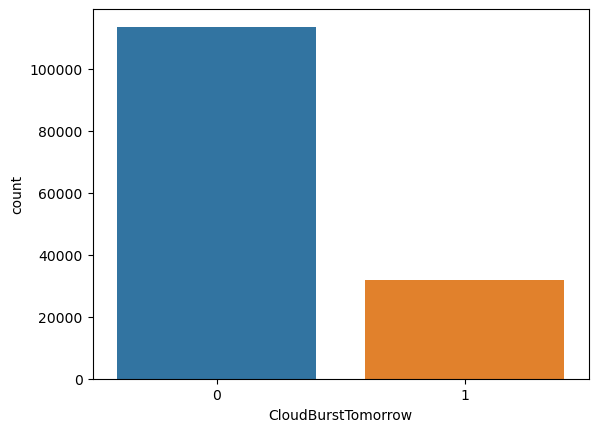

In [35]:
sns.countplot(cloud_df["CloudBurstTomorrow"])

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKSHAT\anaconda3\li

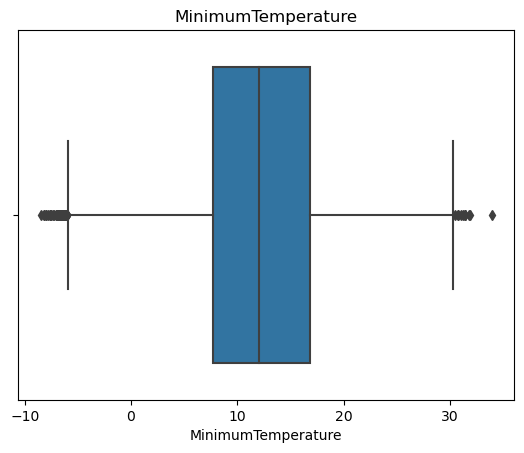

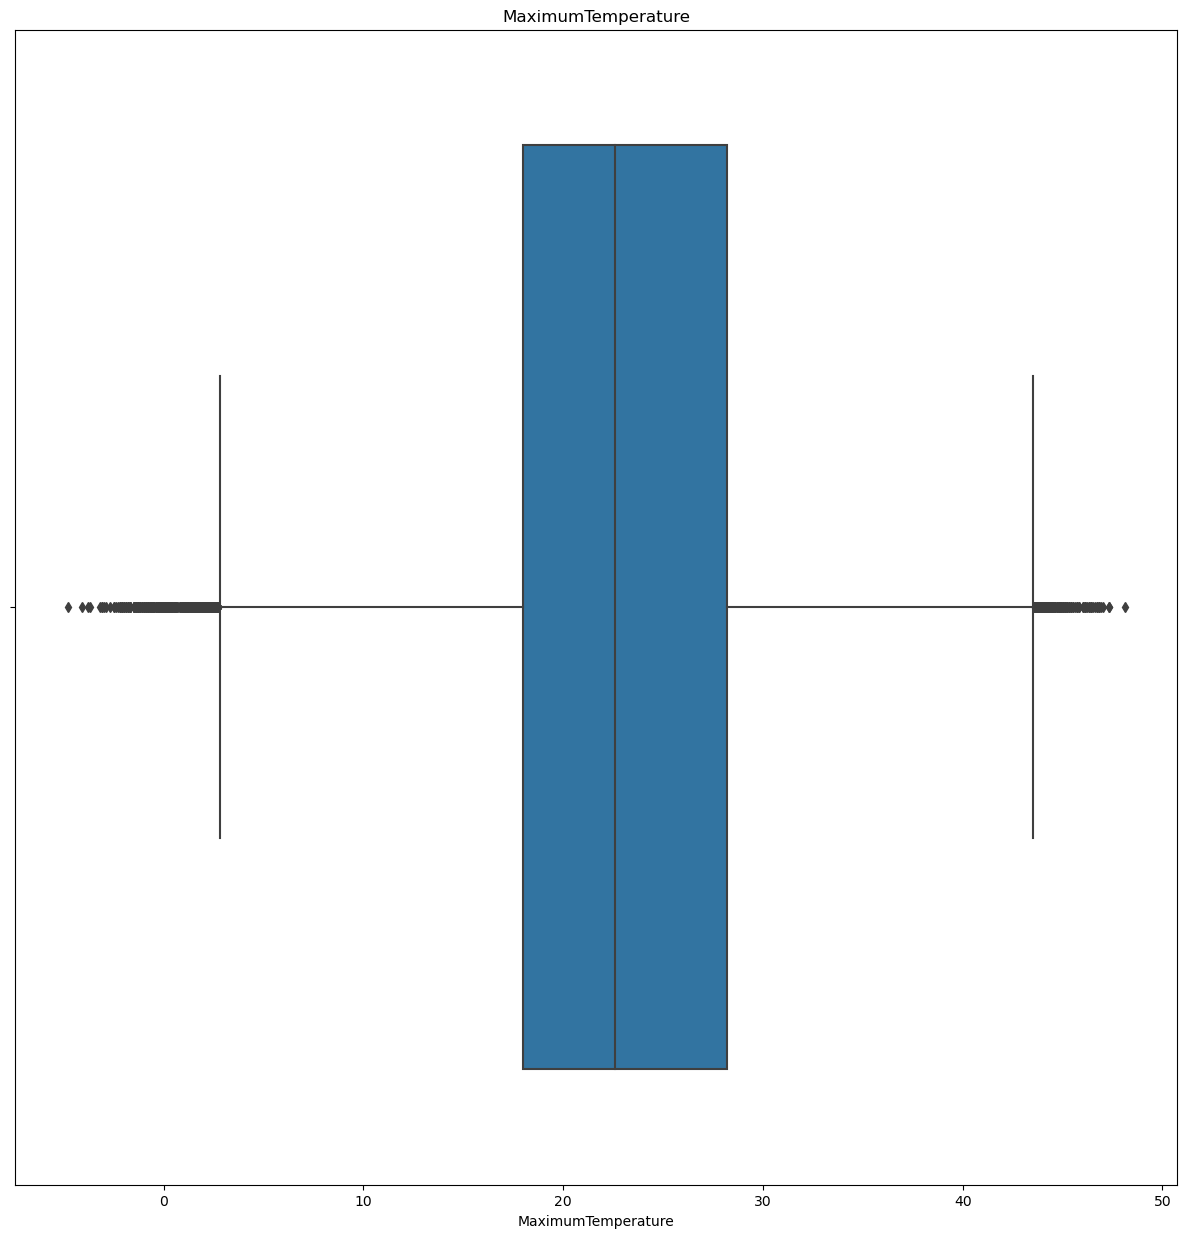

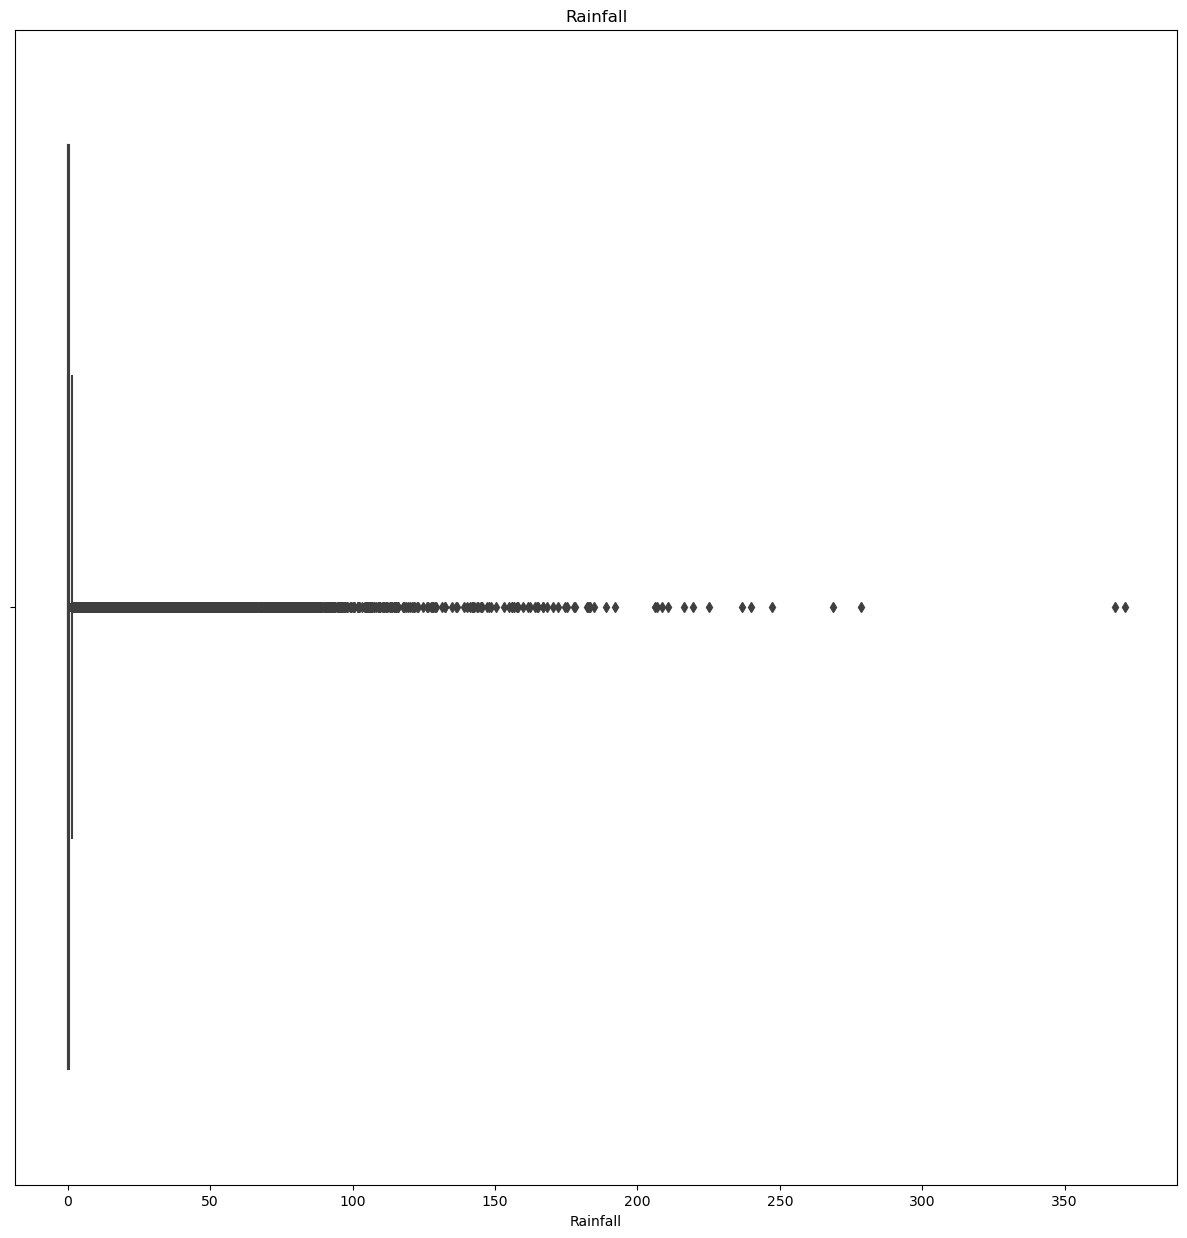

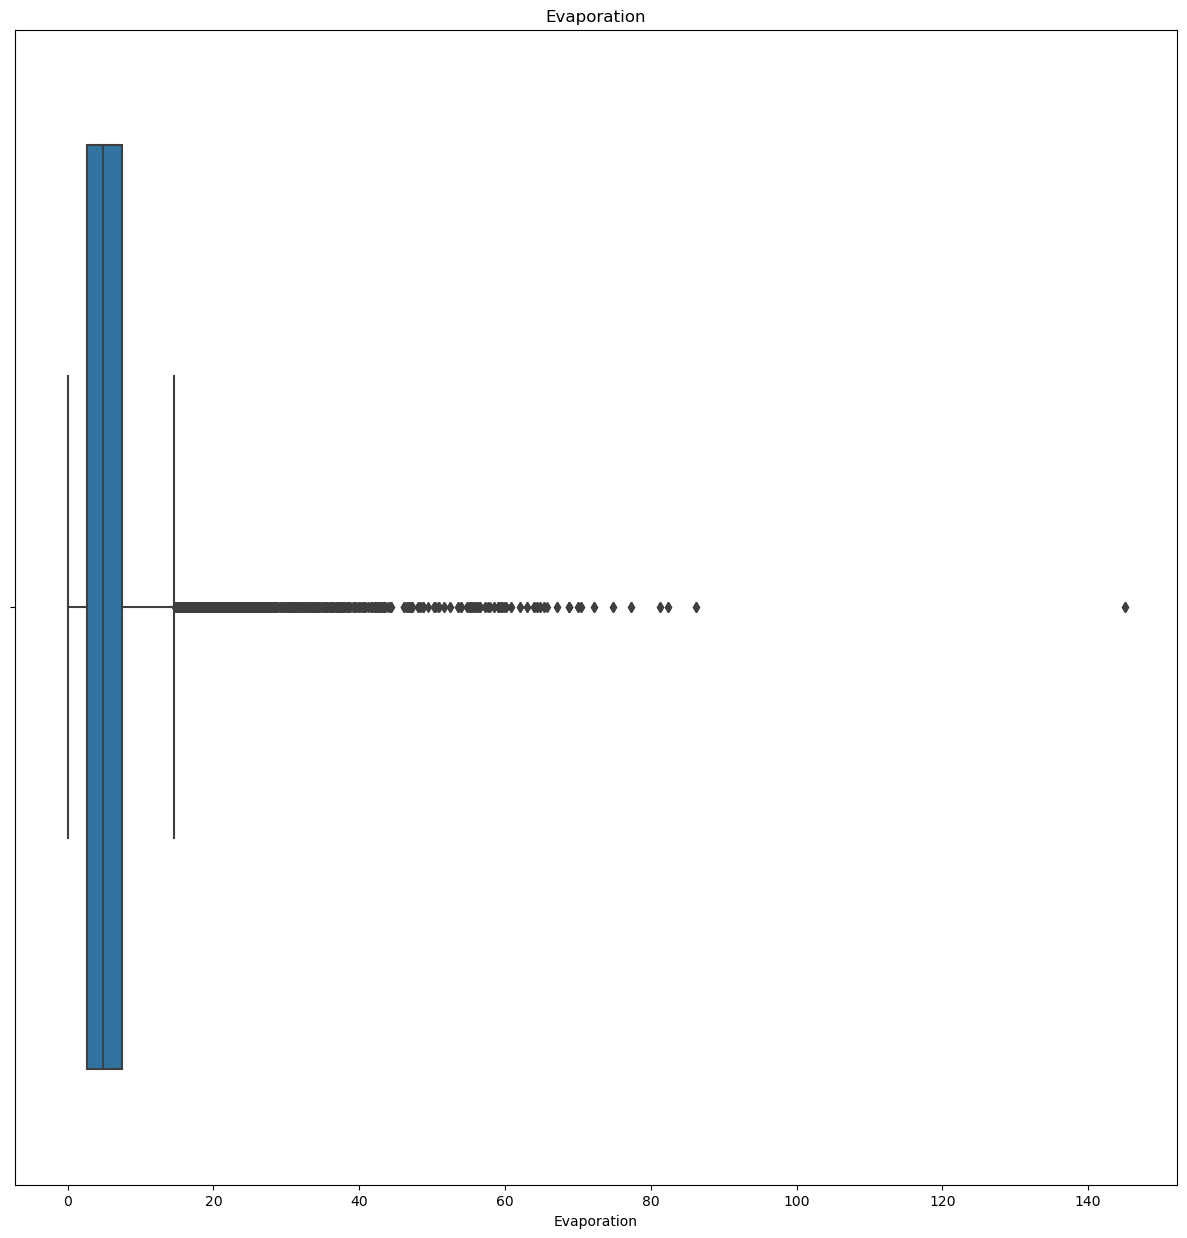

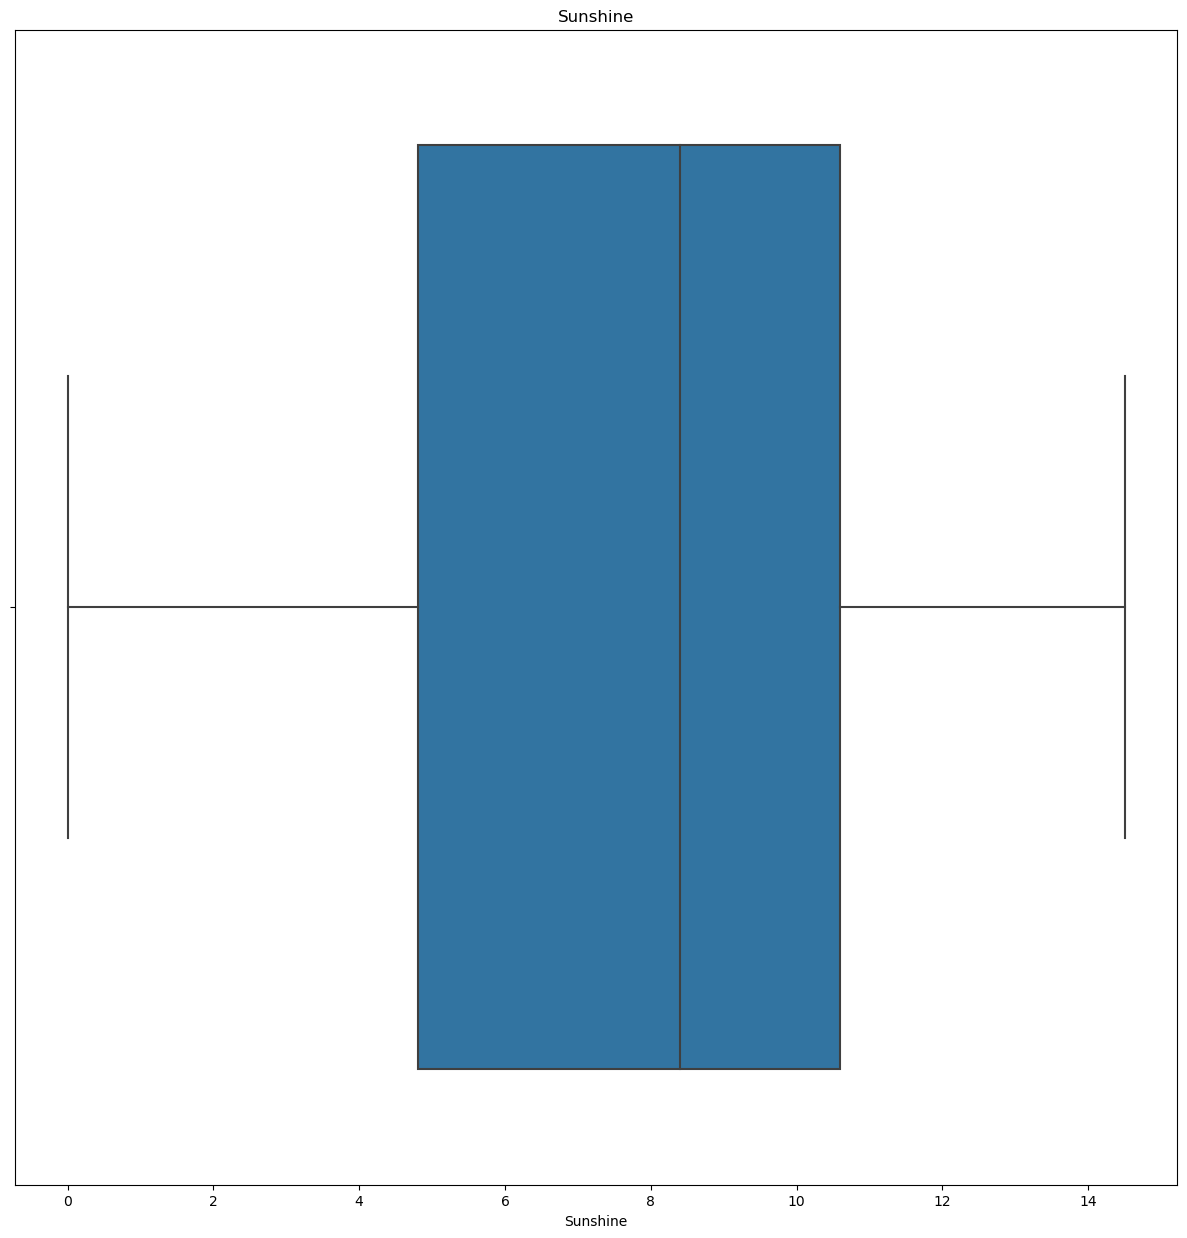

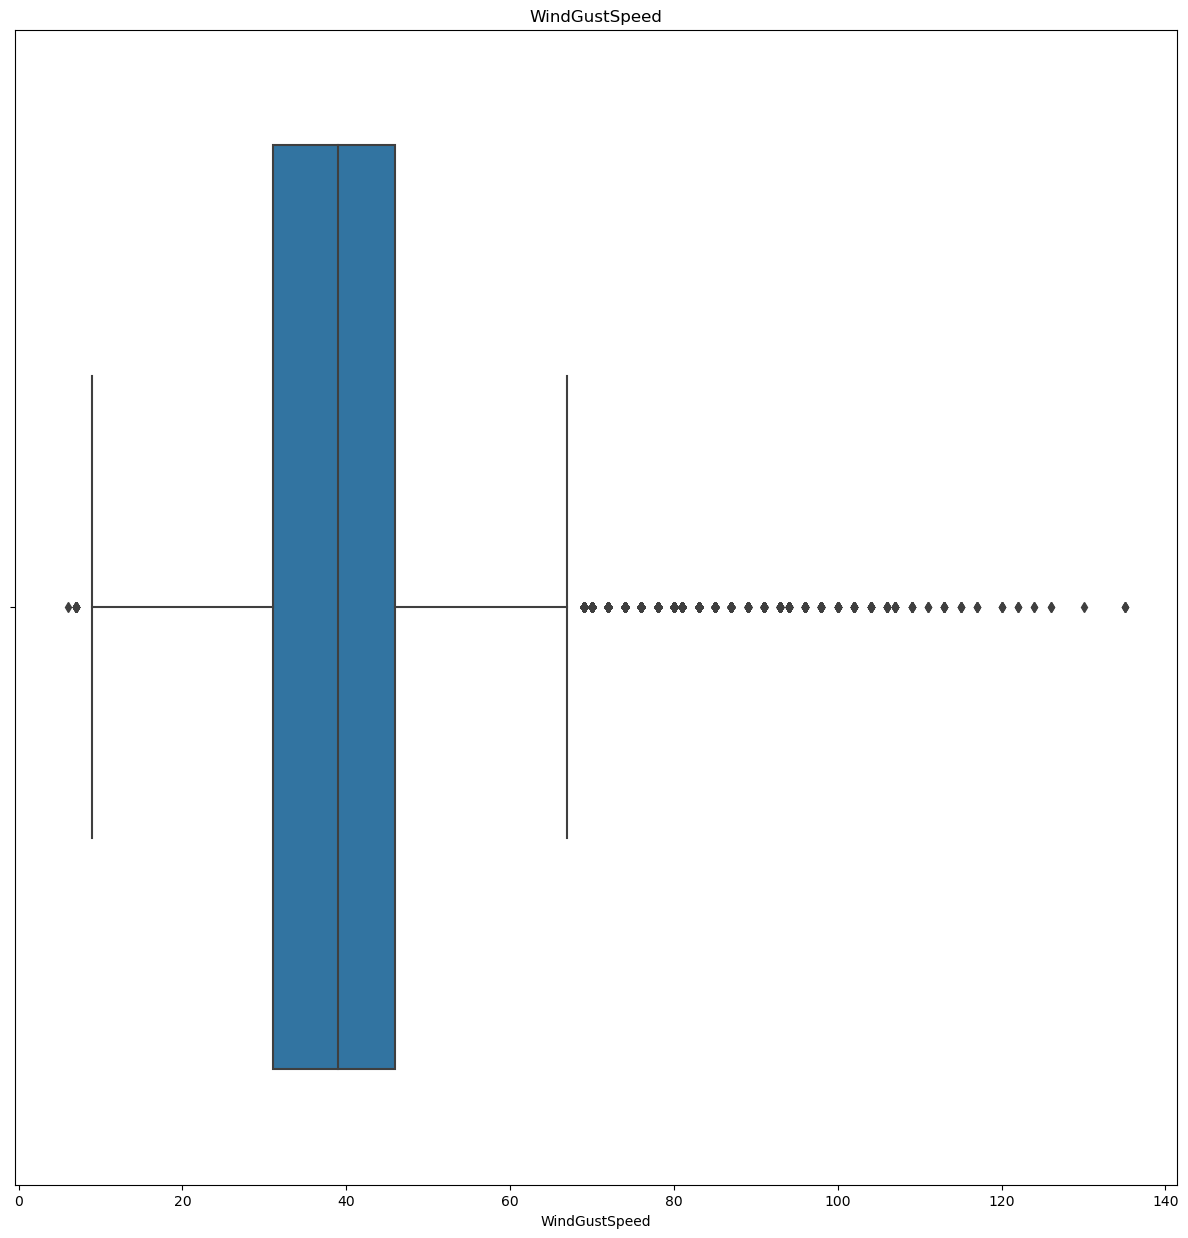

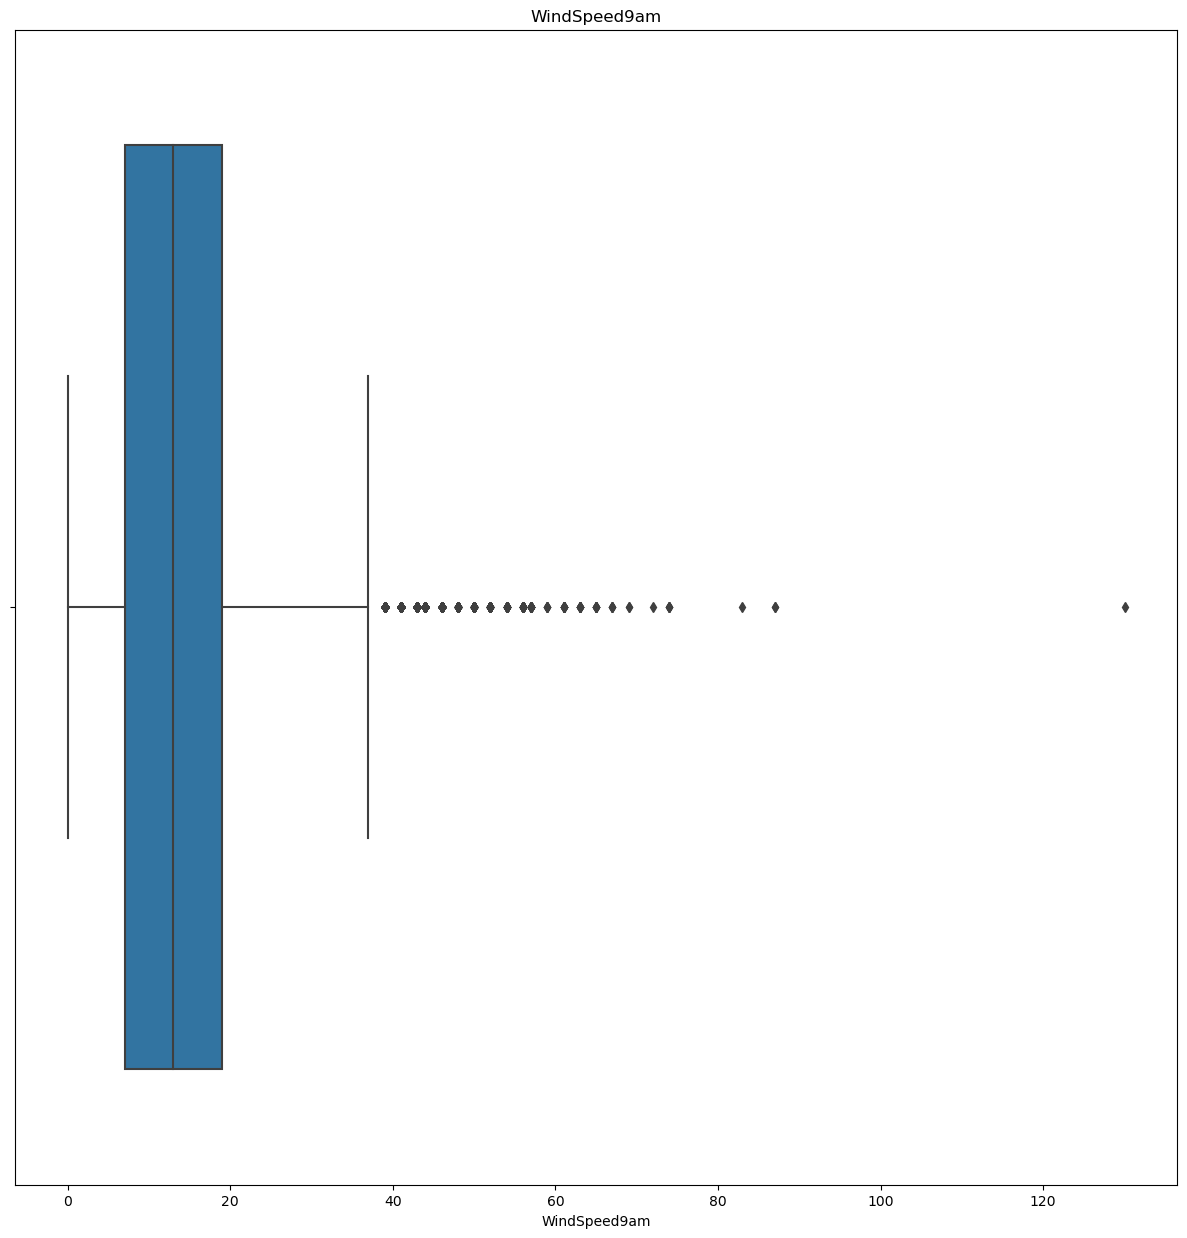

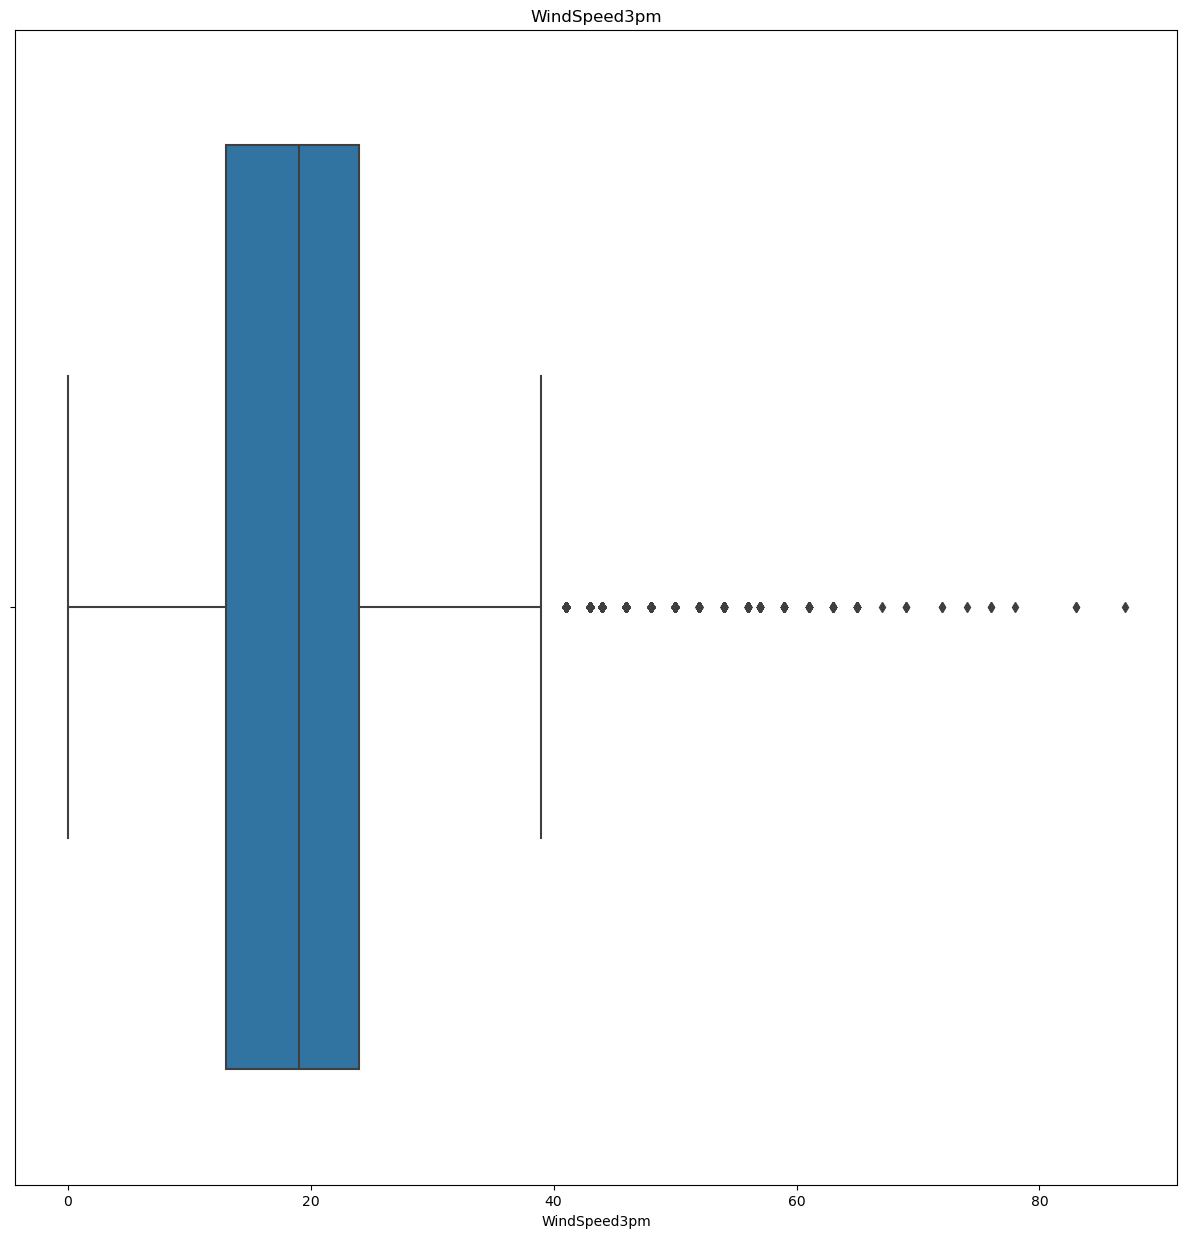

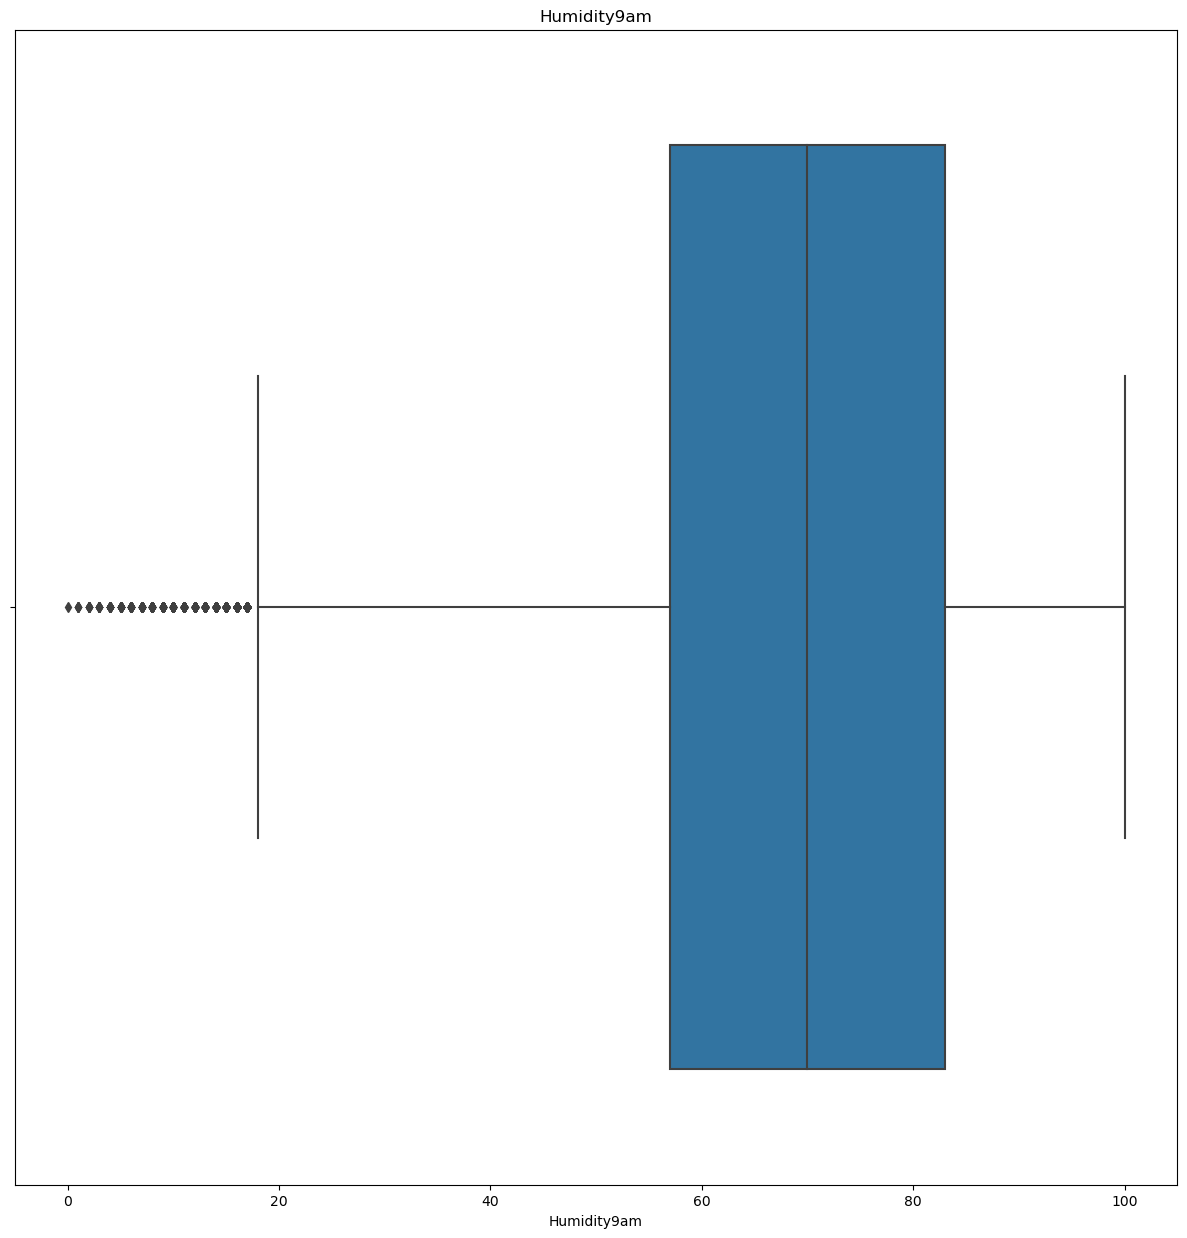

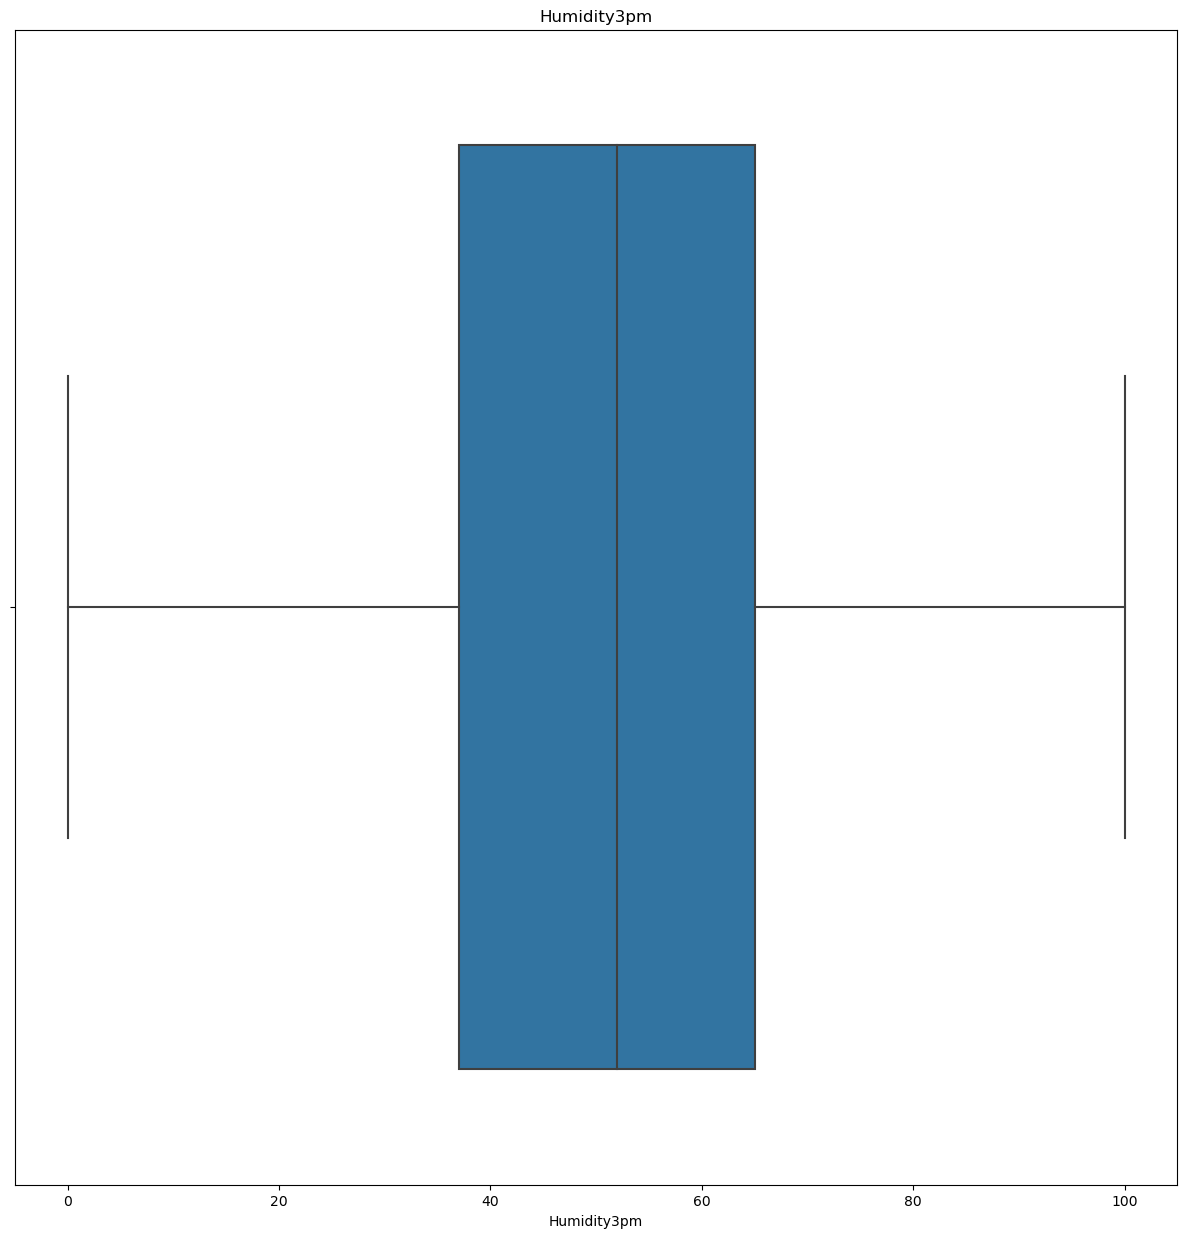

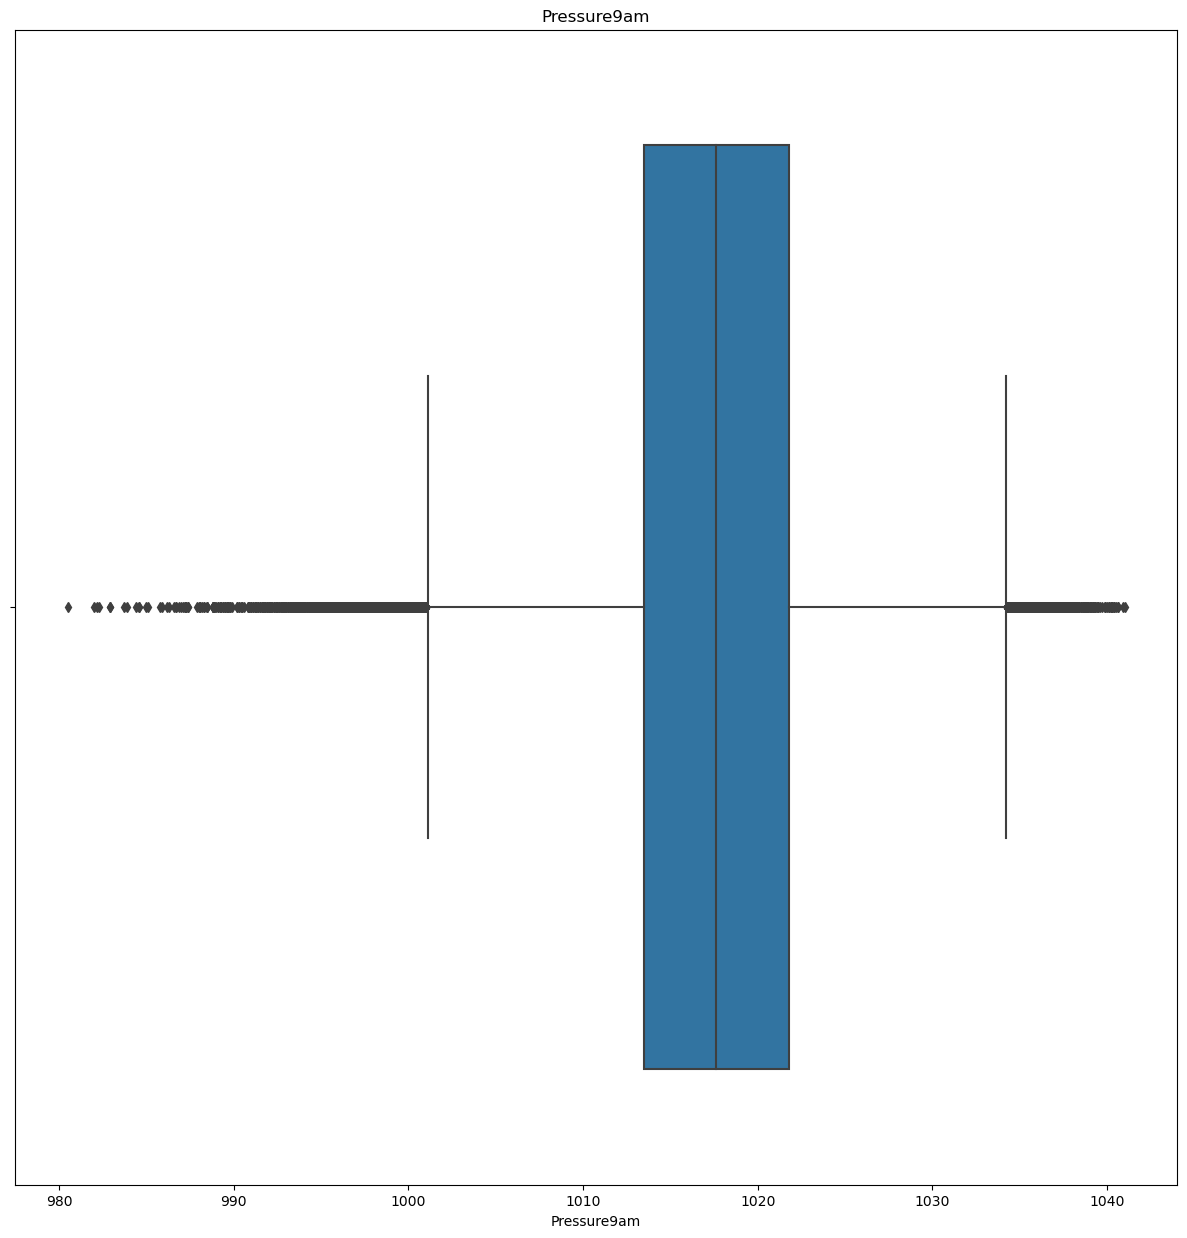

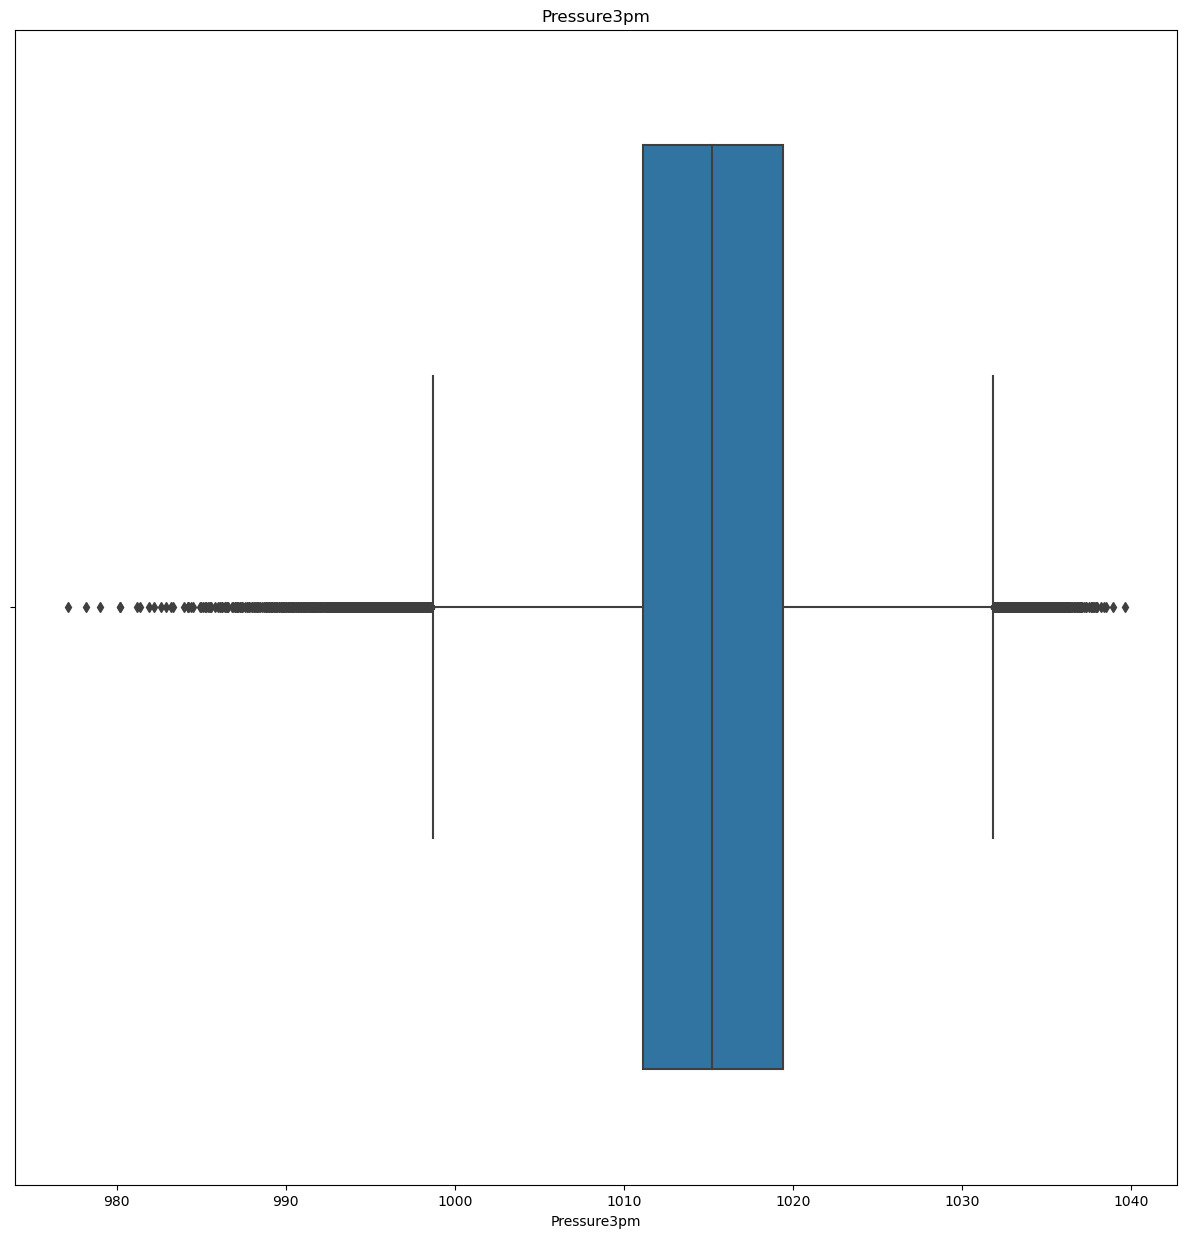

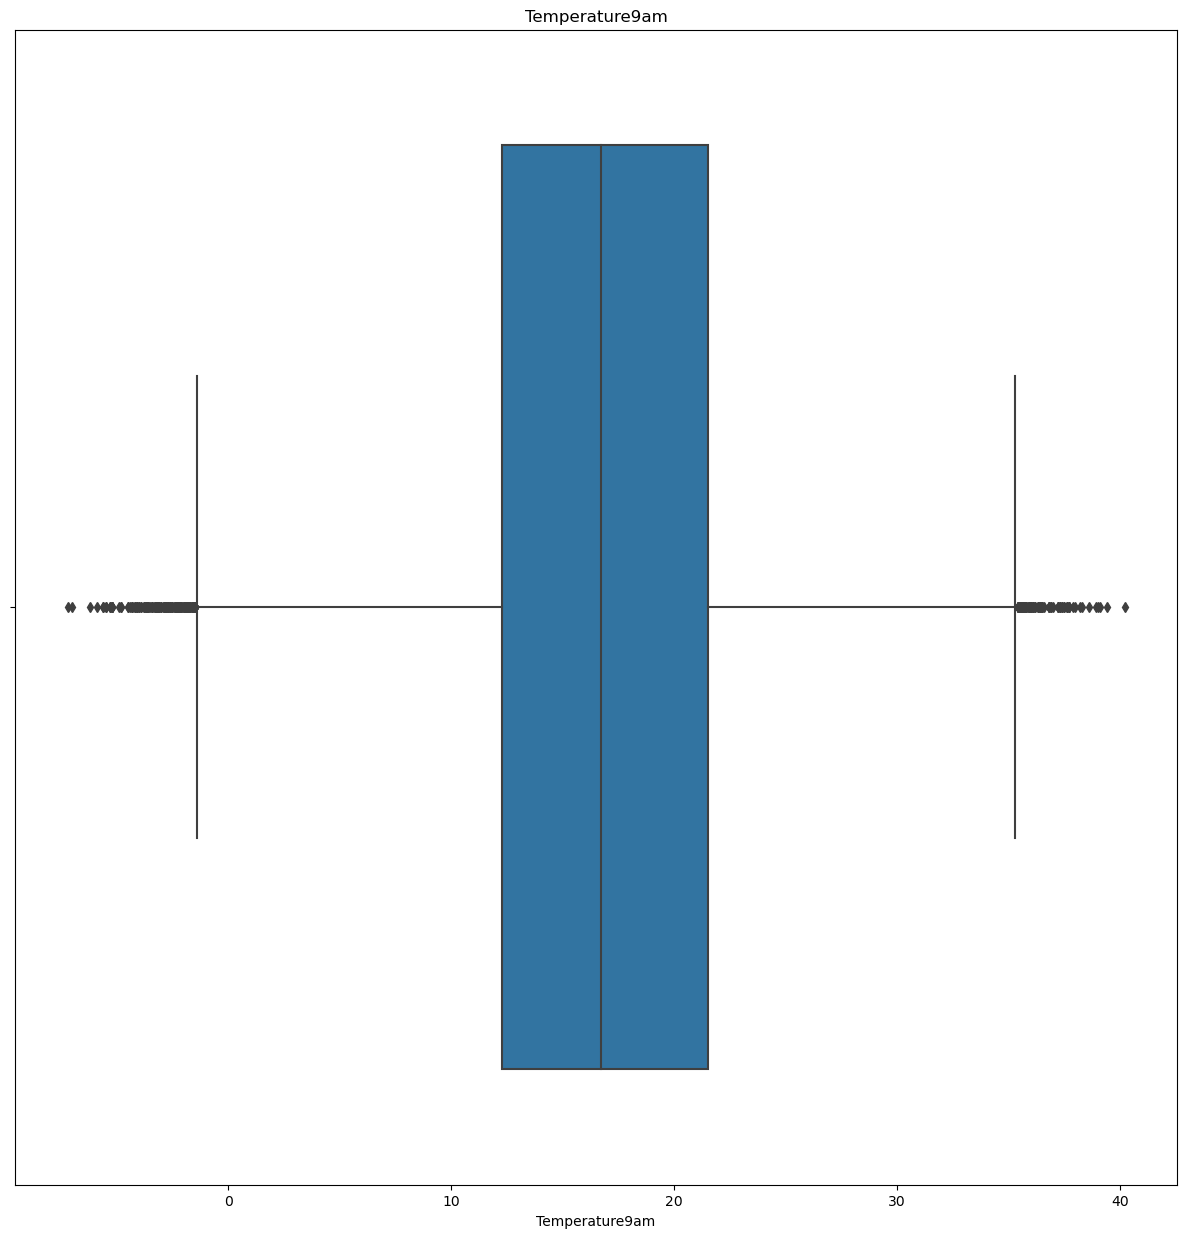

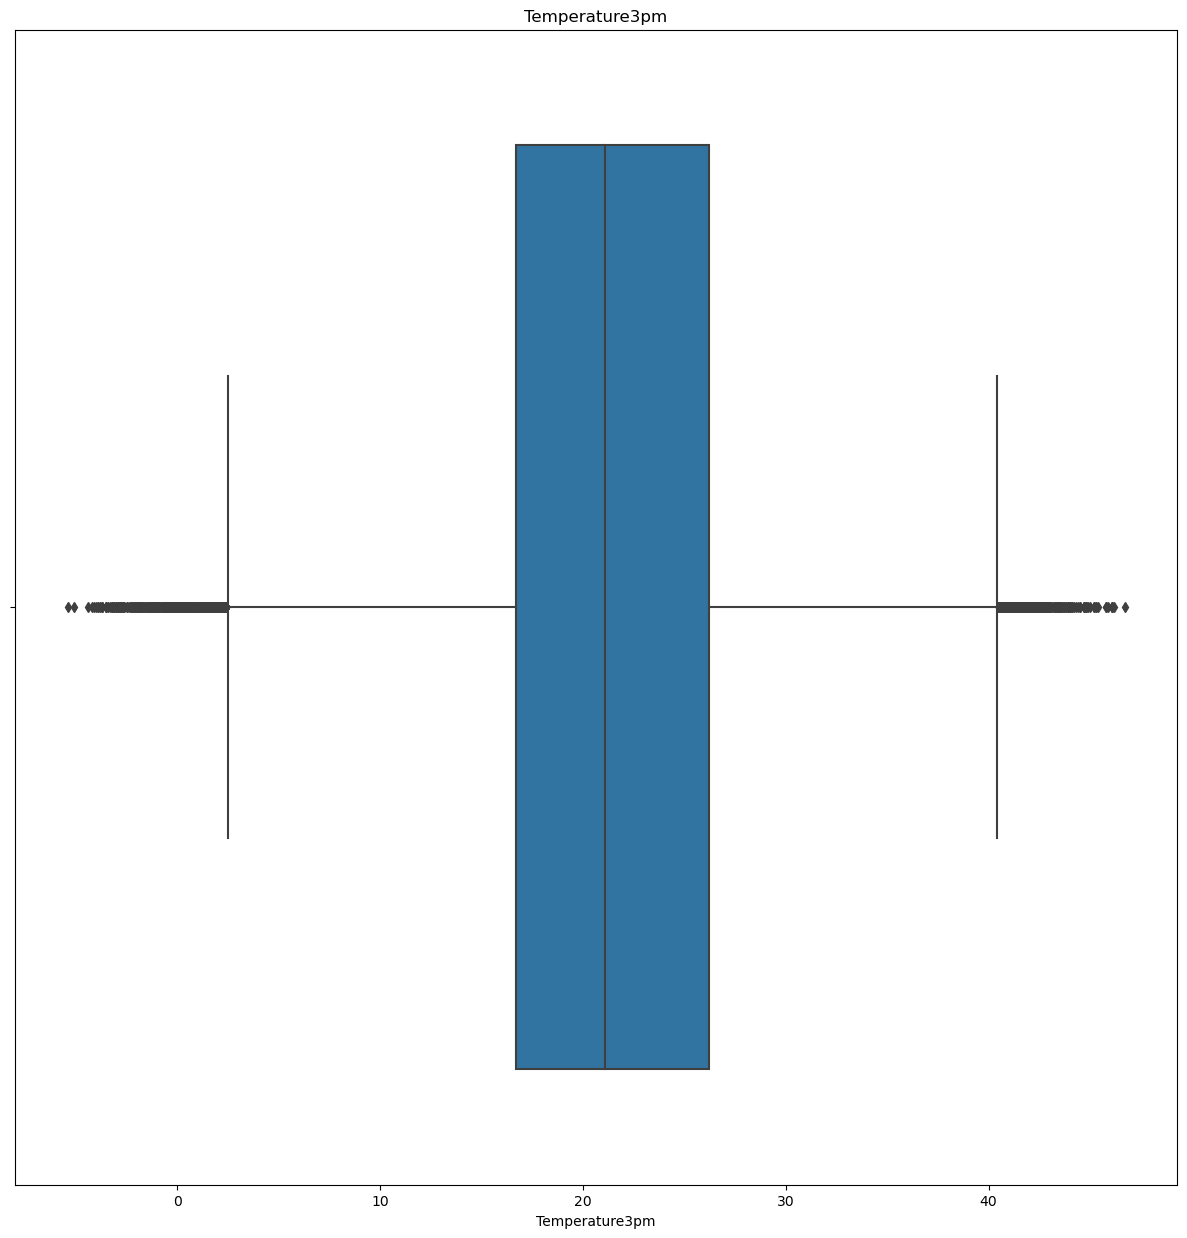

<Figure size 1500x1500 with 0 Axes>

In [37]:
for feature in continuous_data:
    data=cloud_df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))
  

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

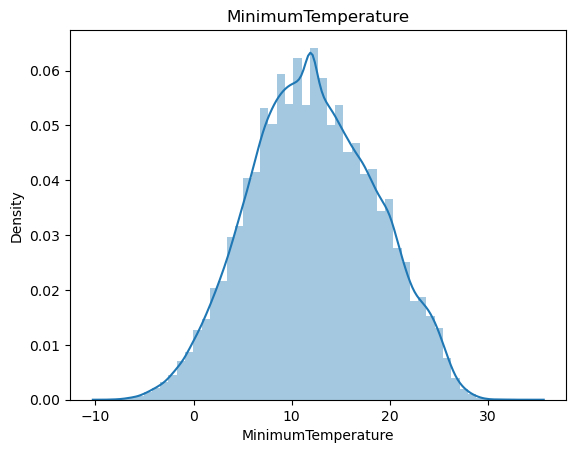

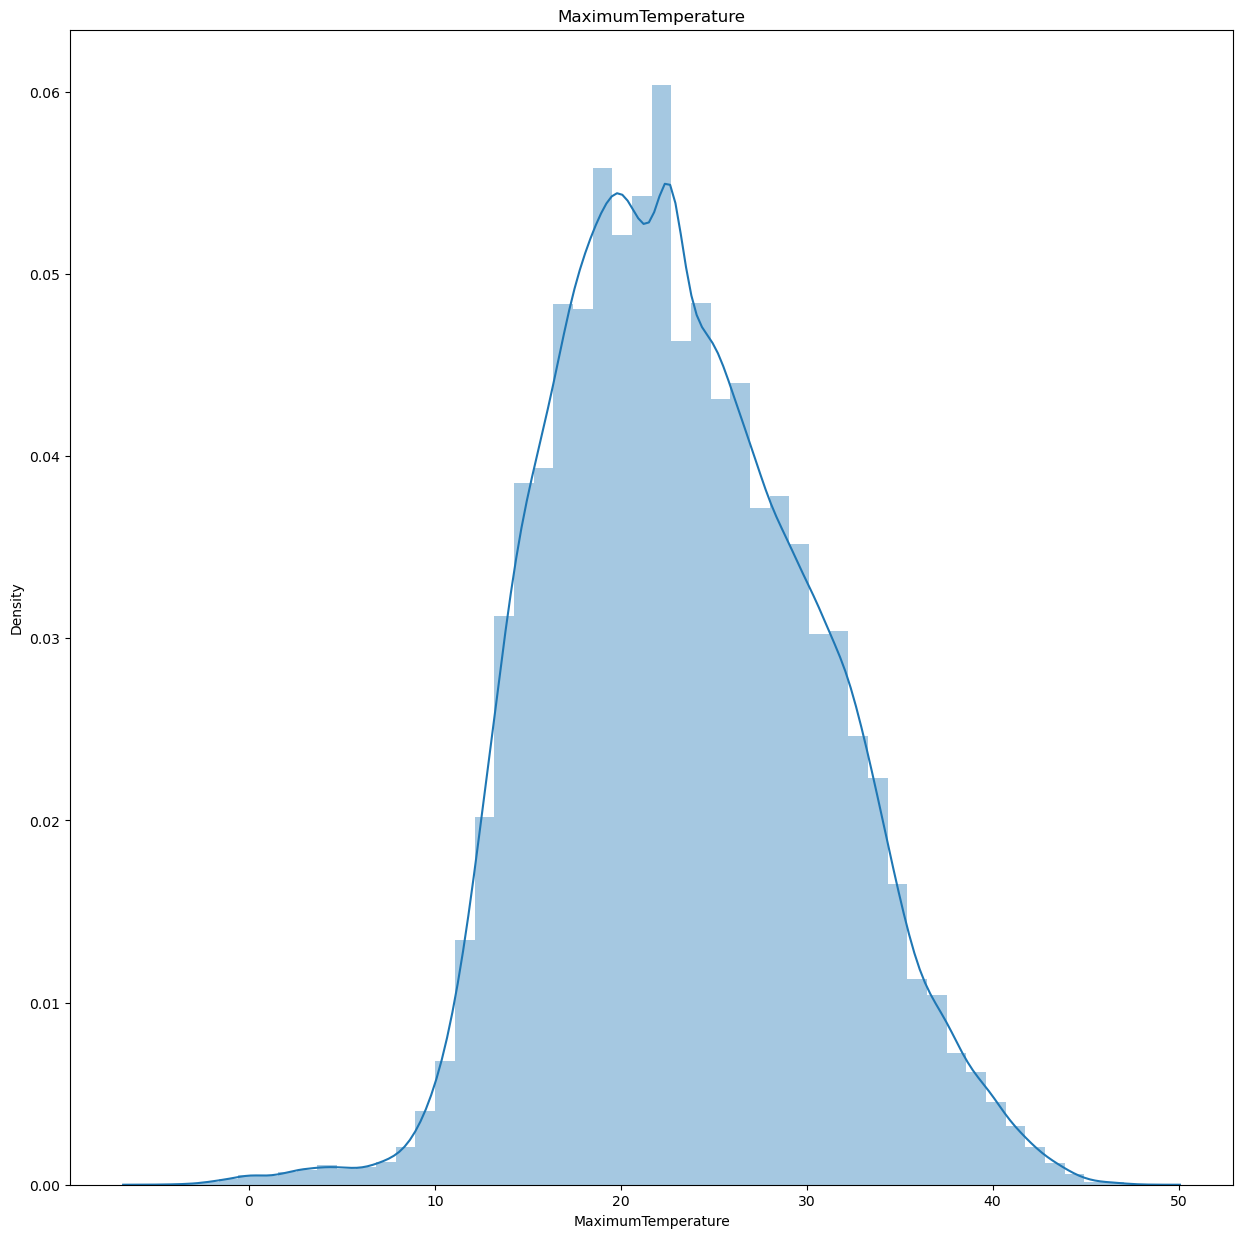

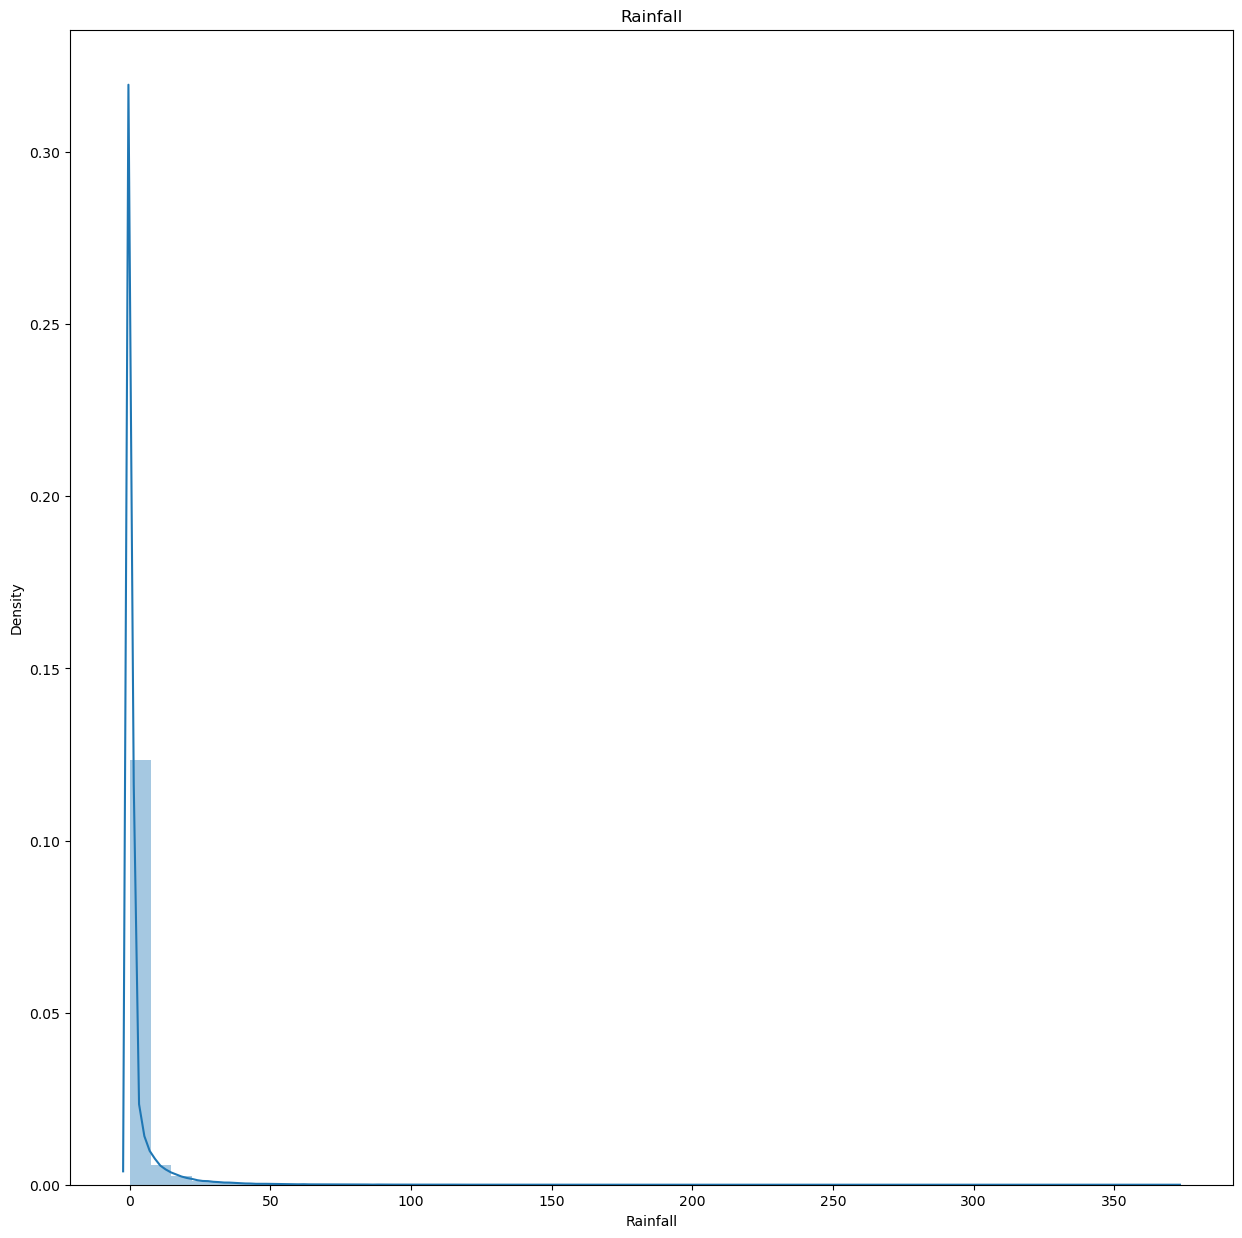

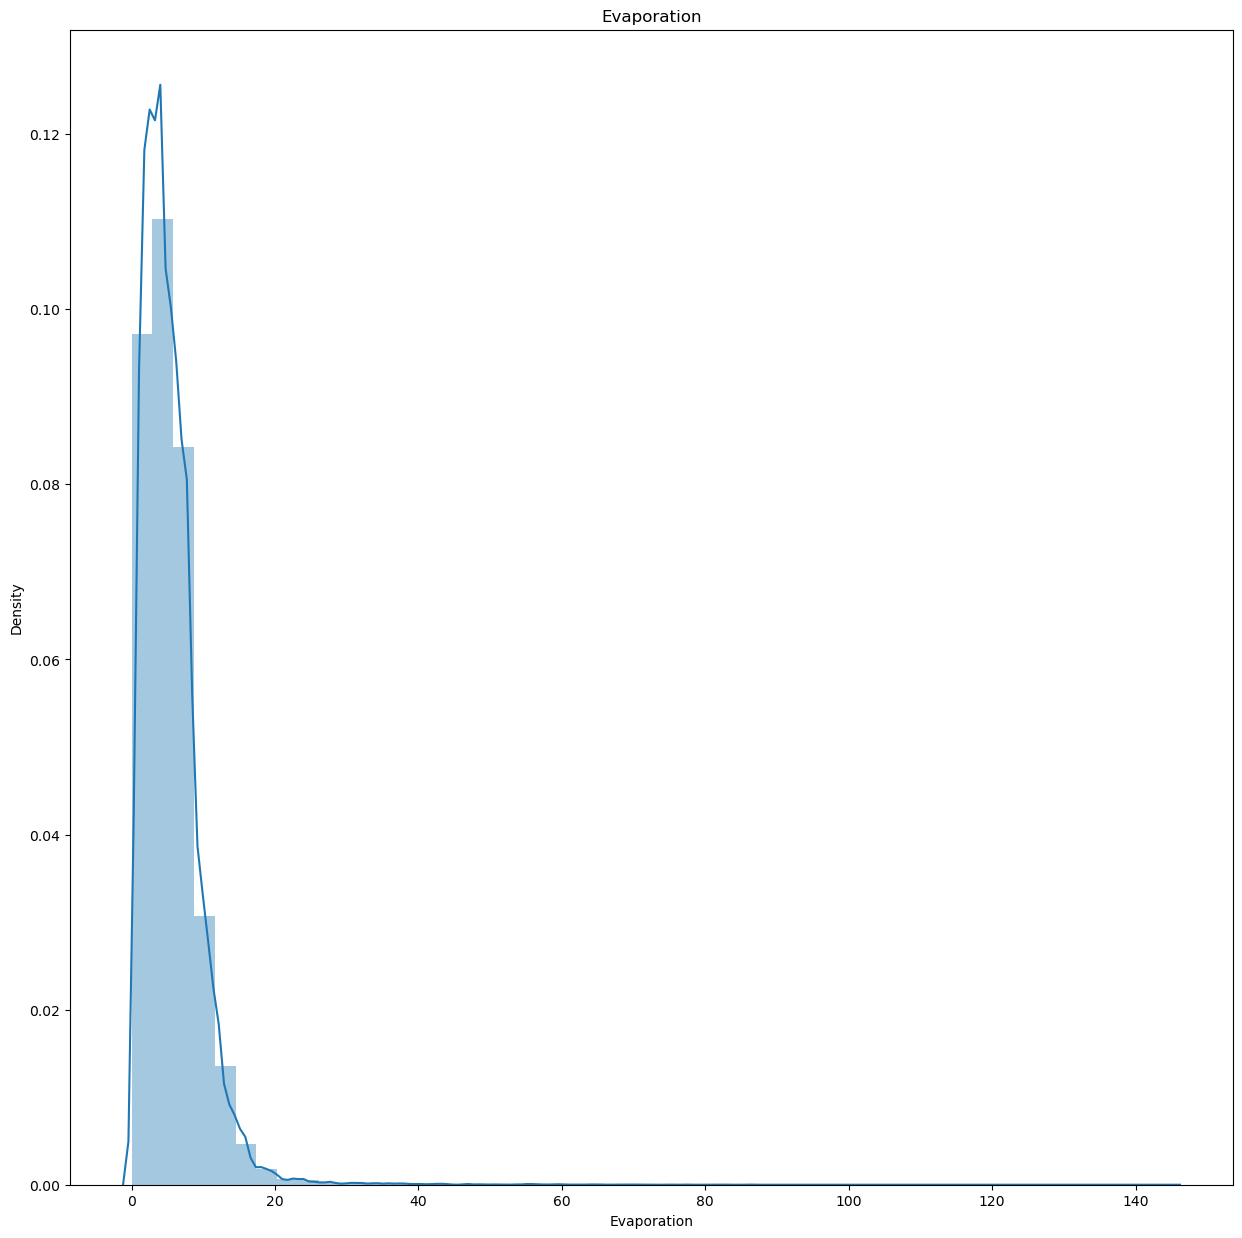

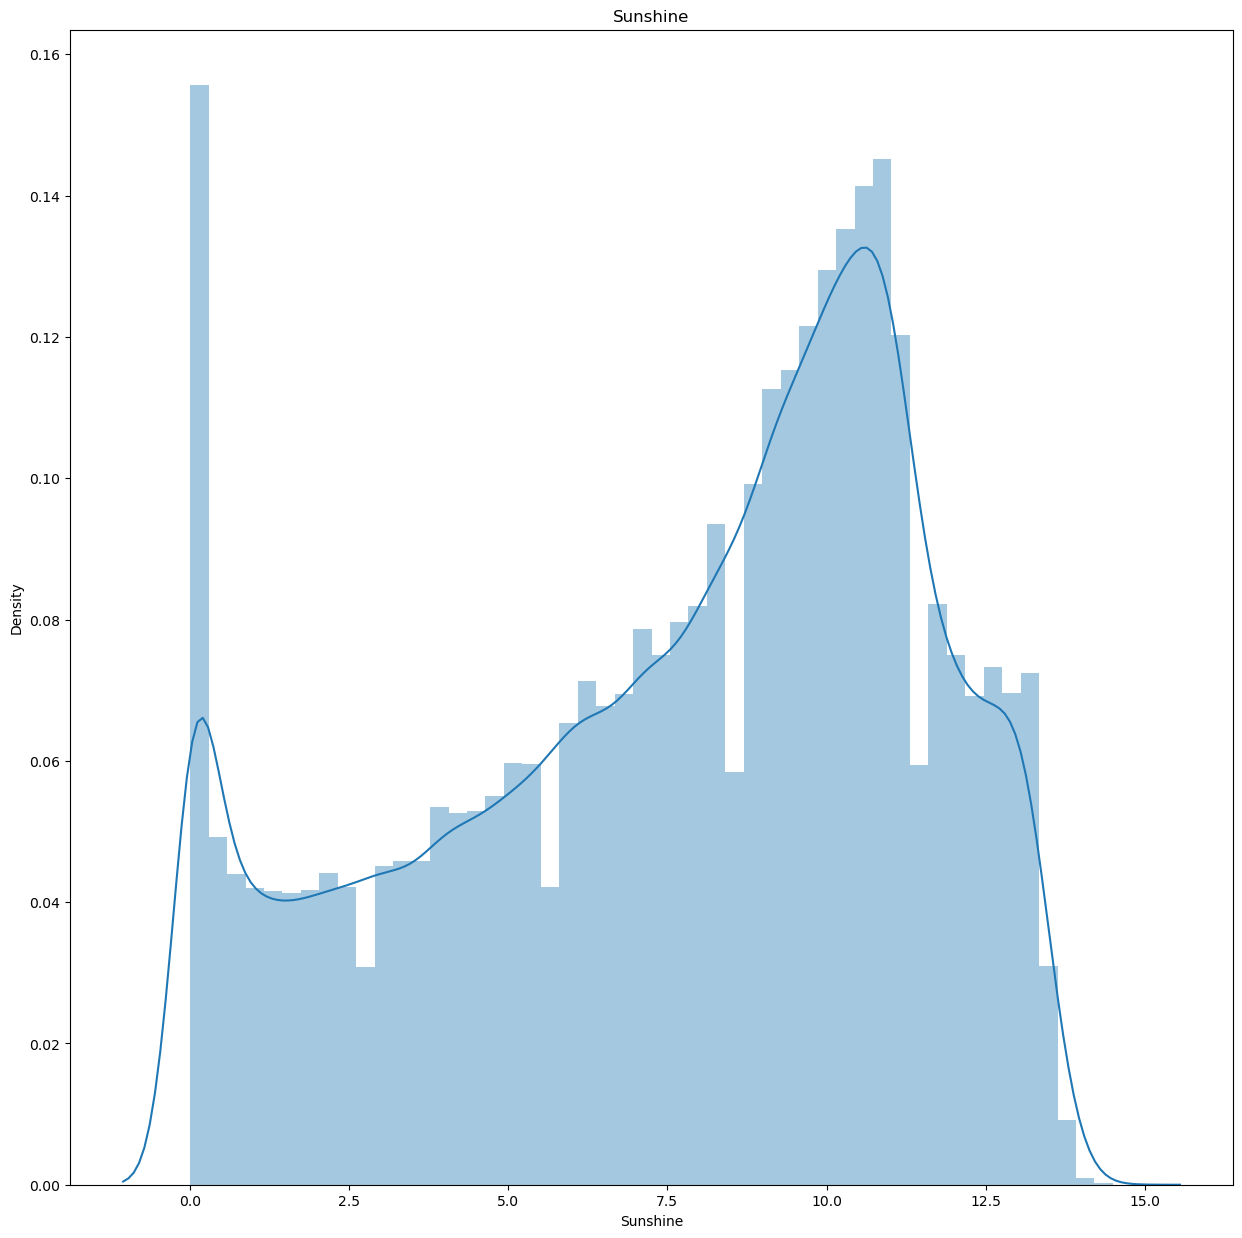

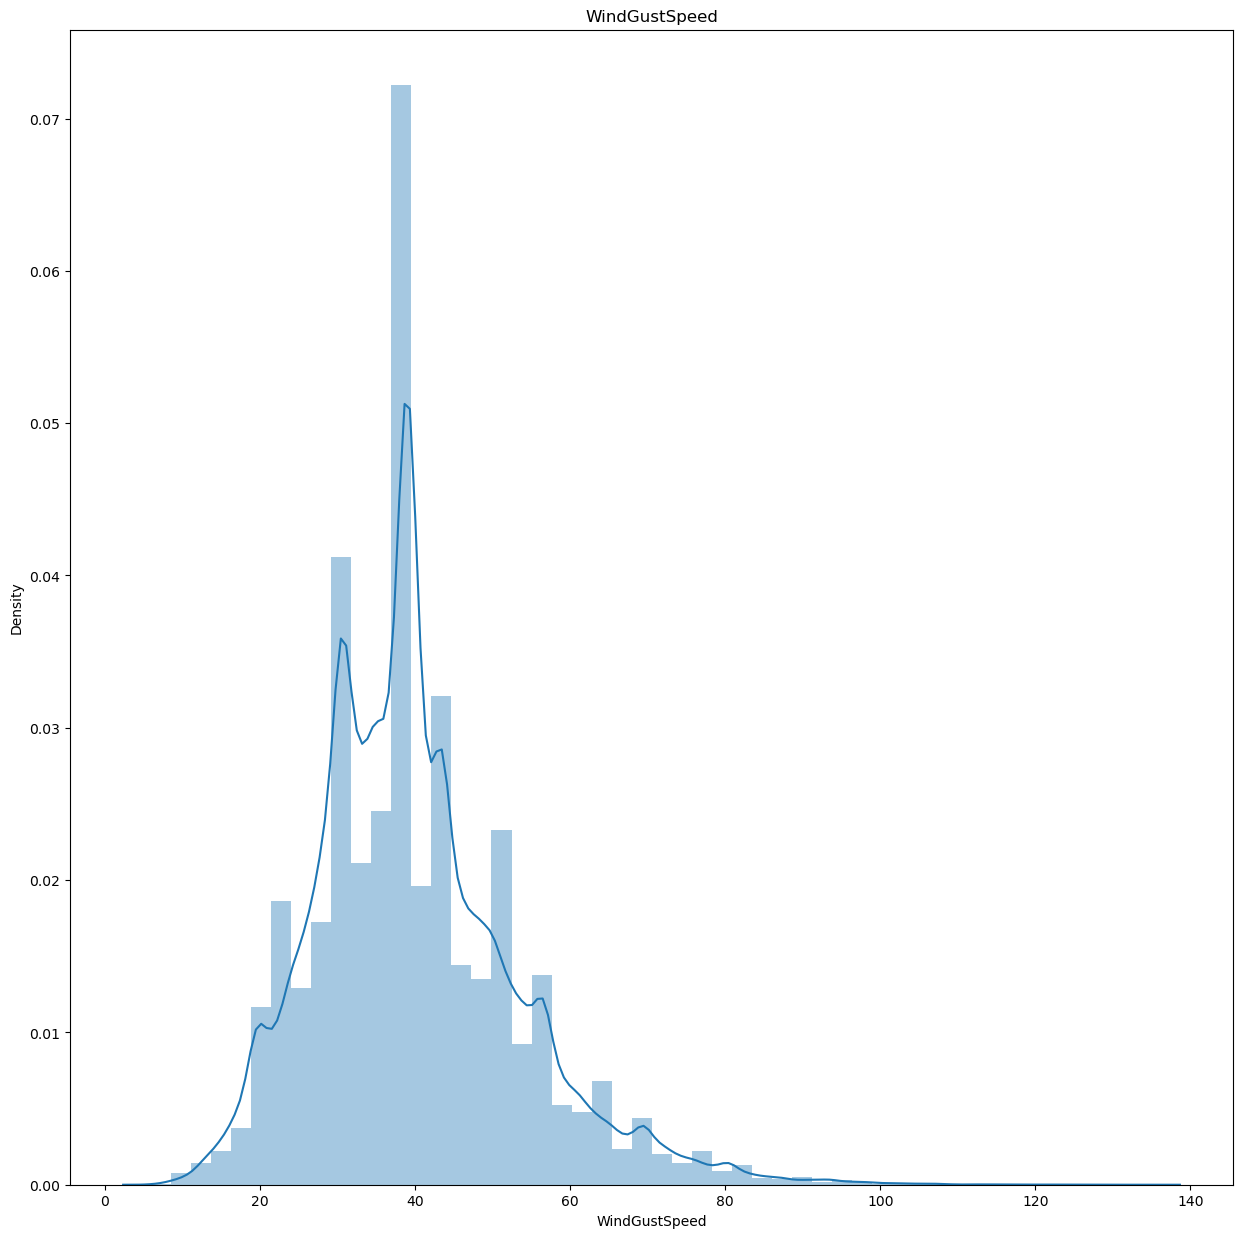

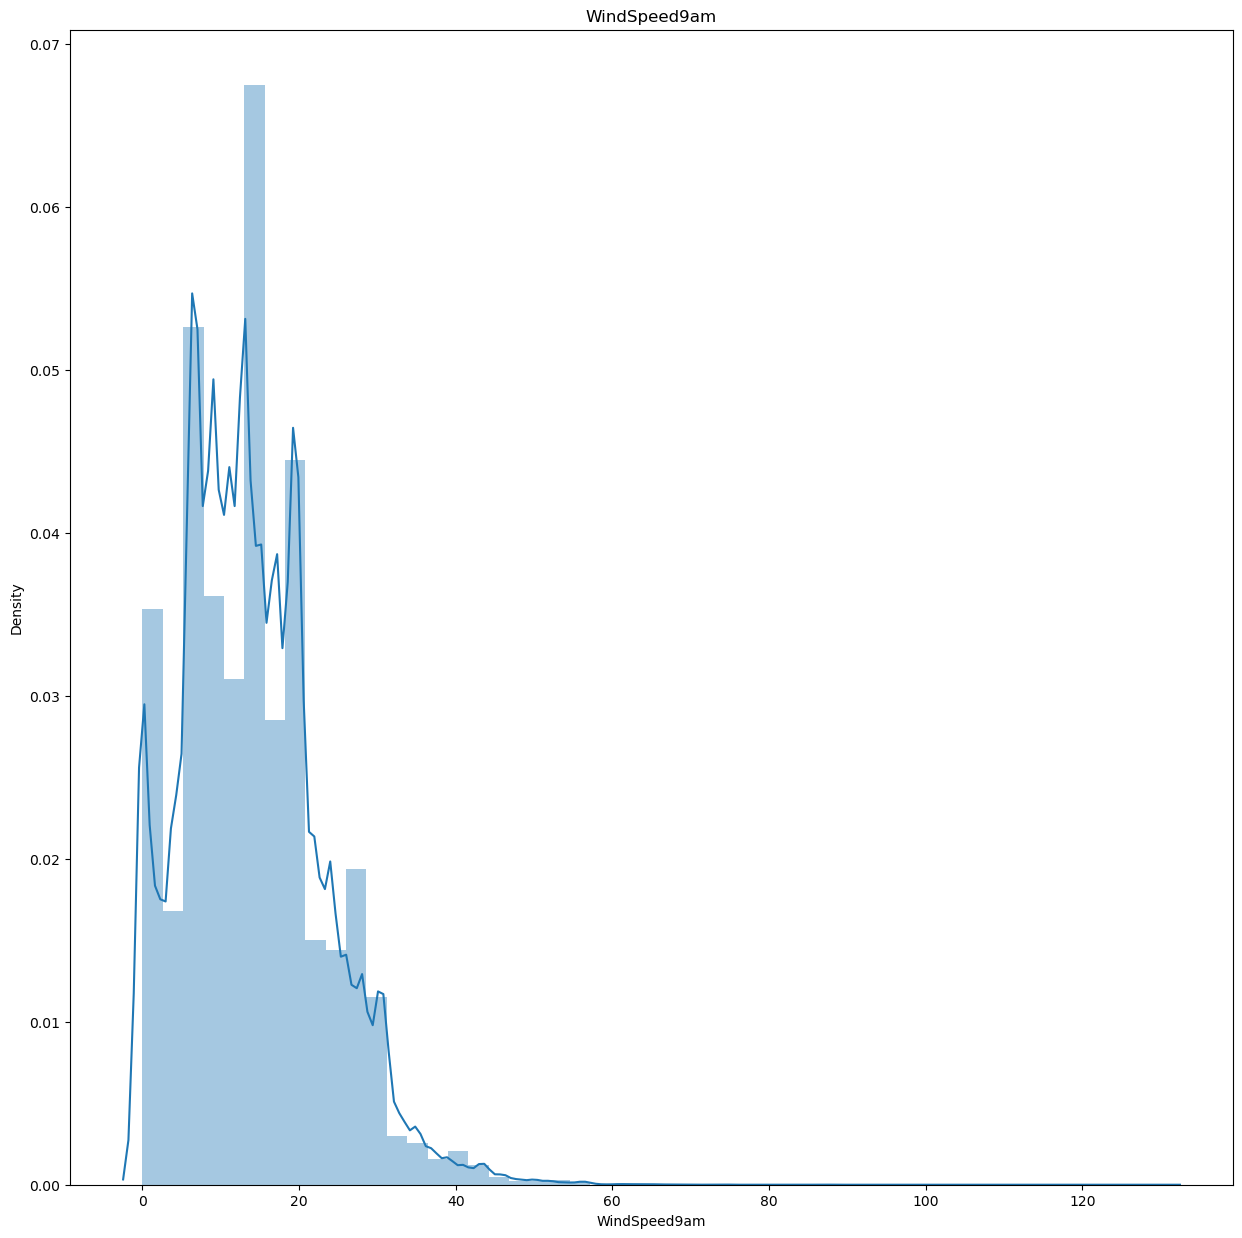

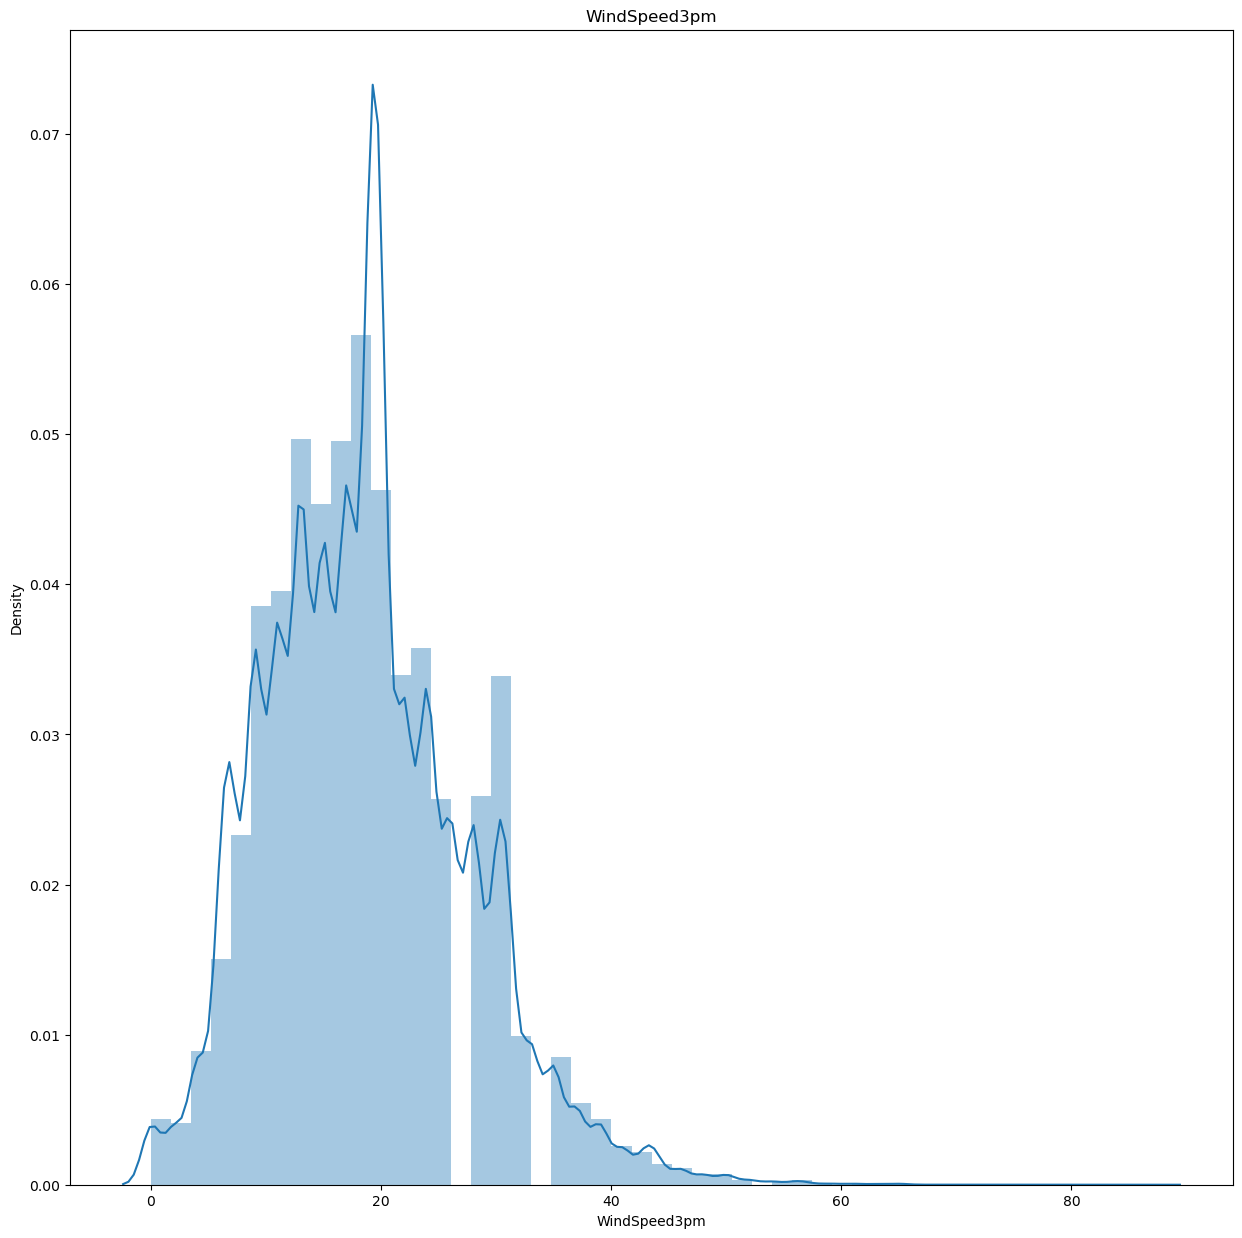

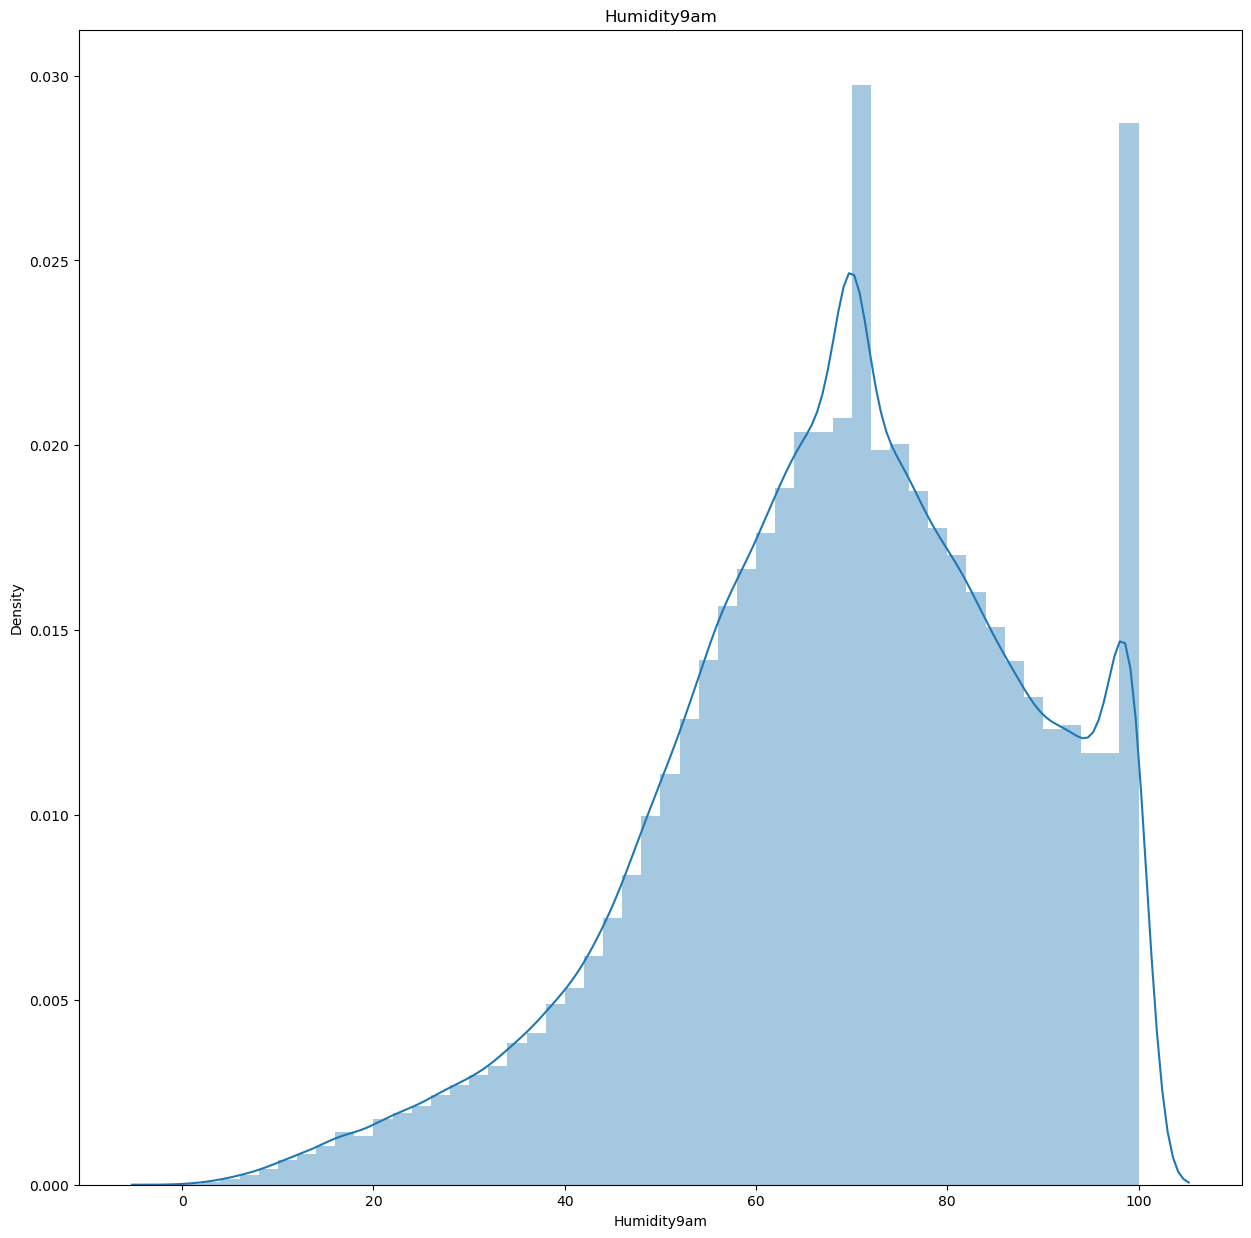

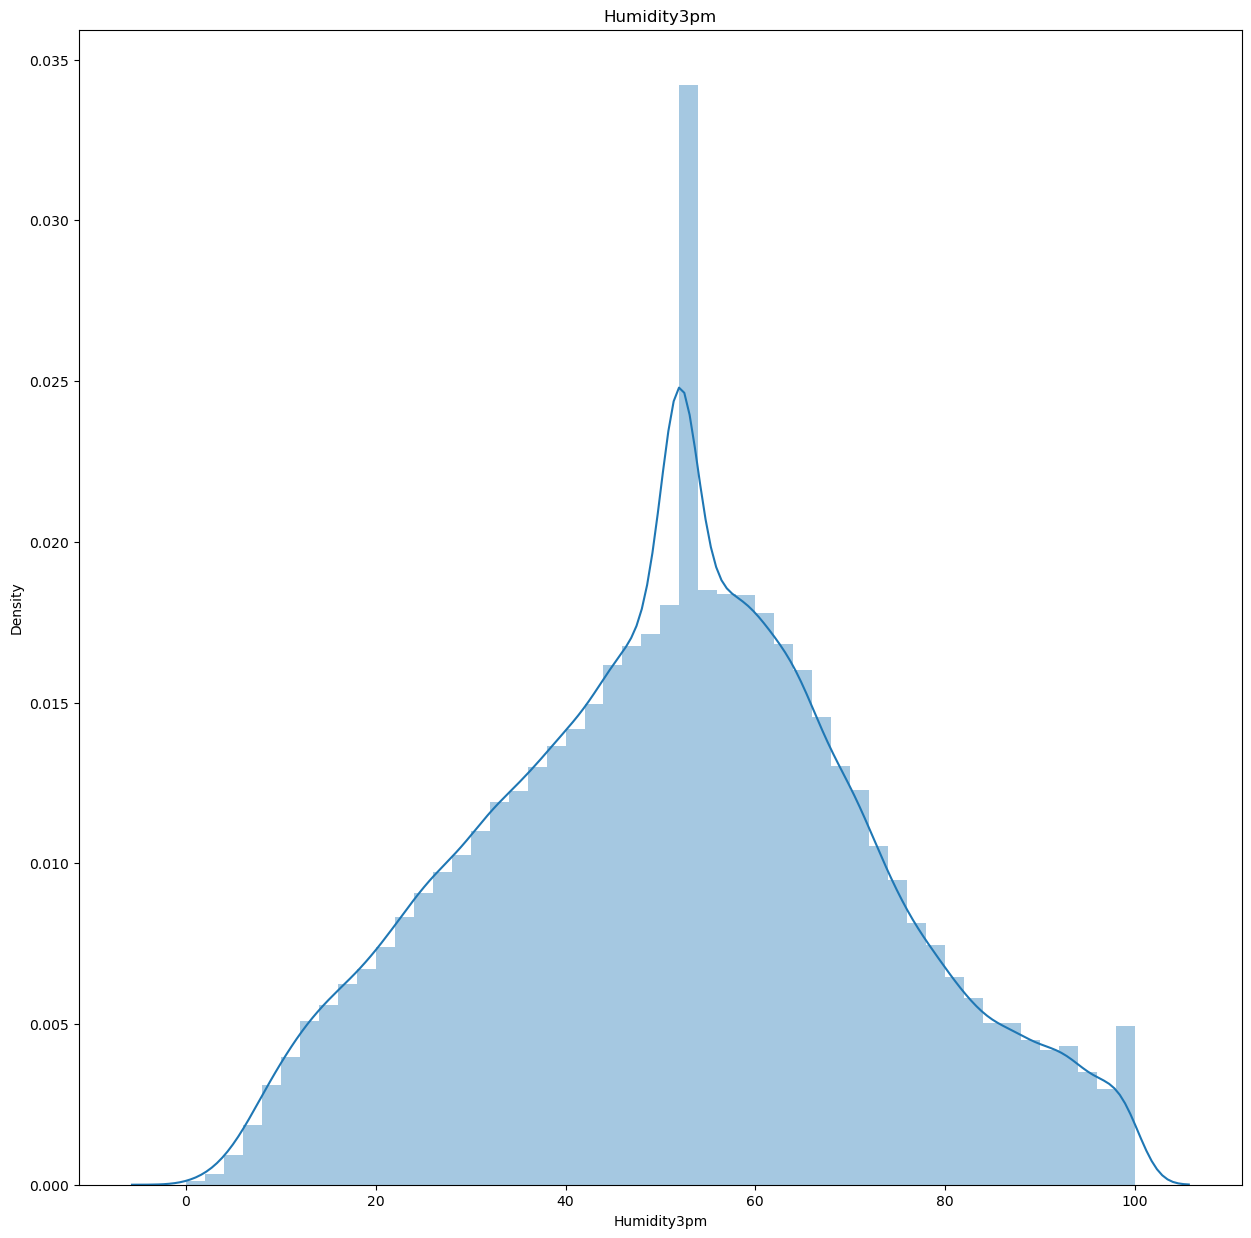

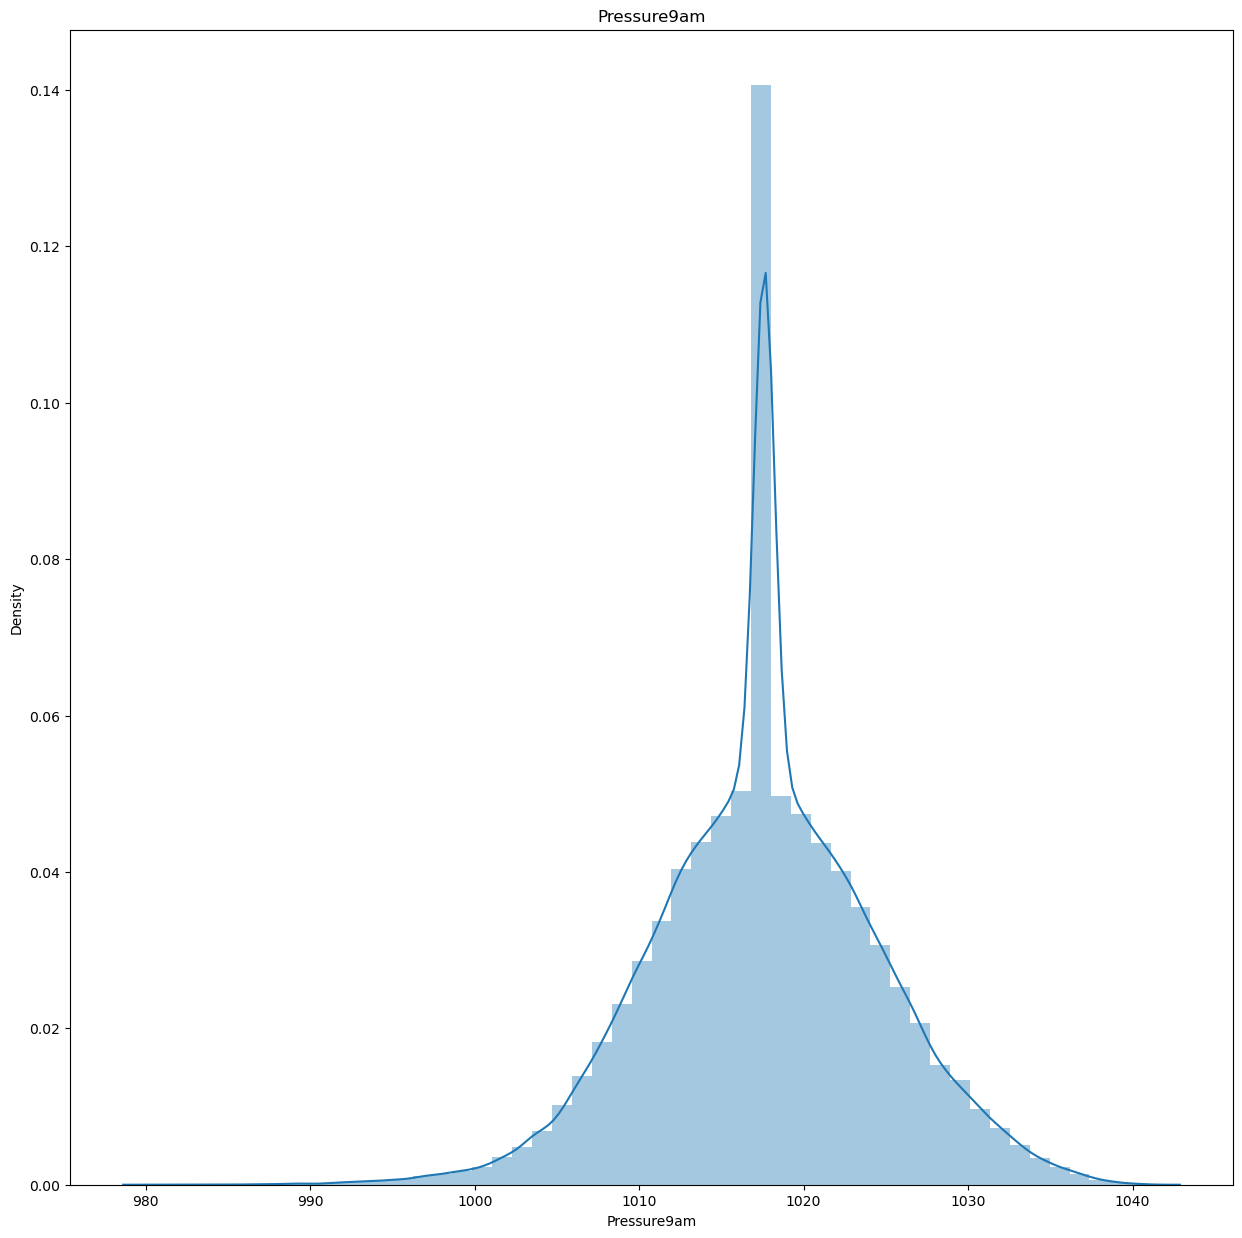

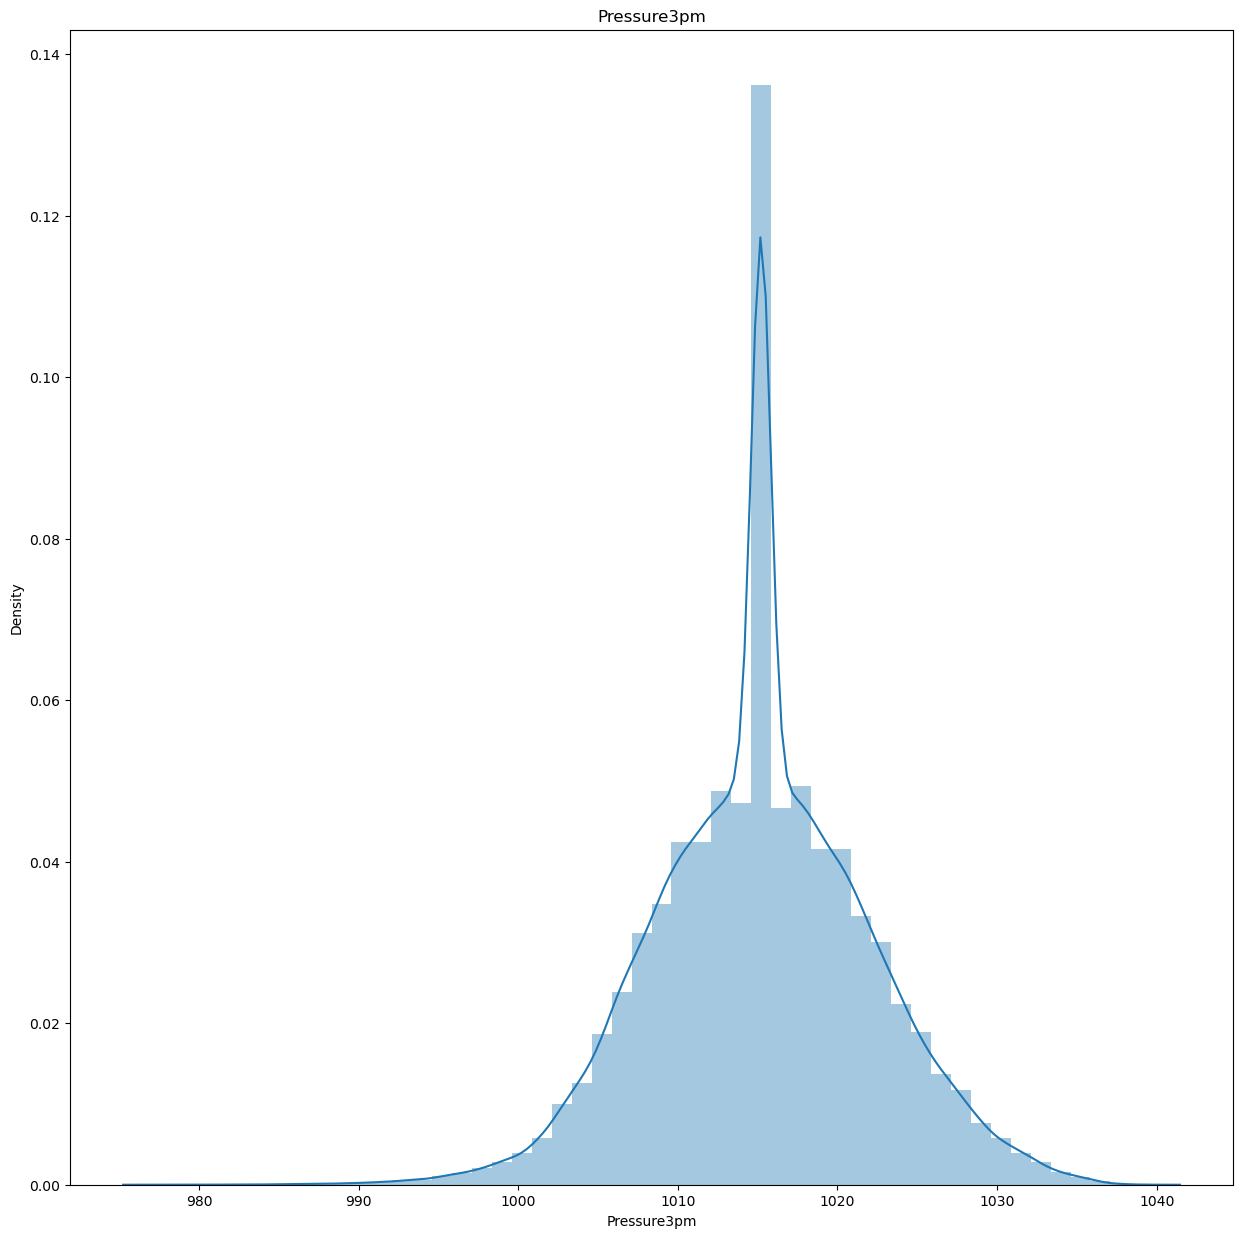

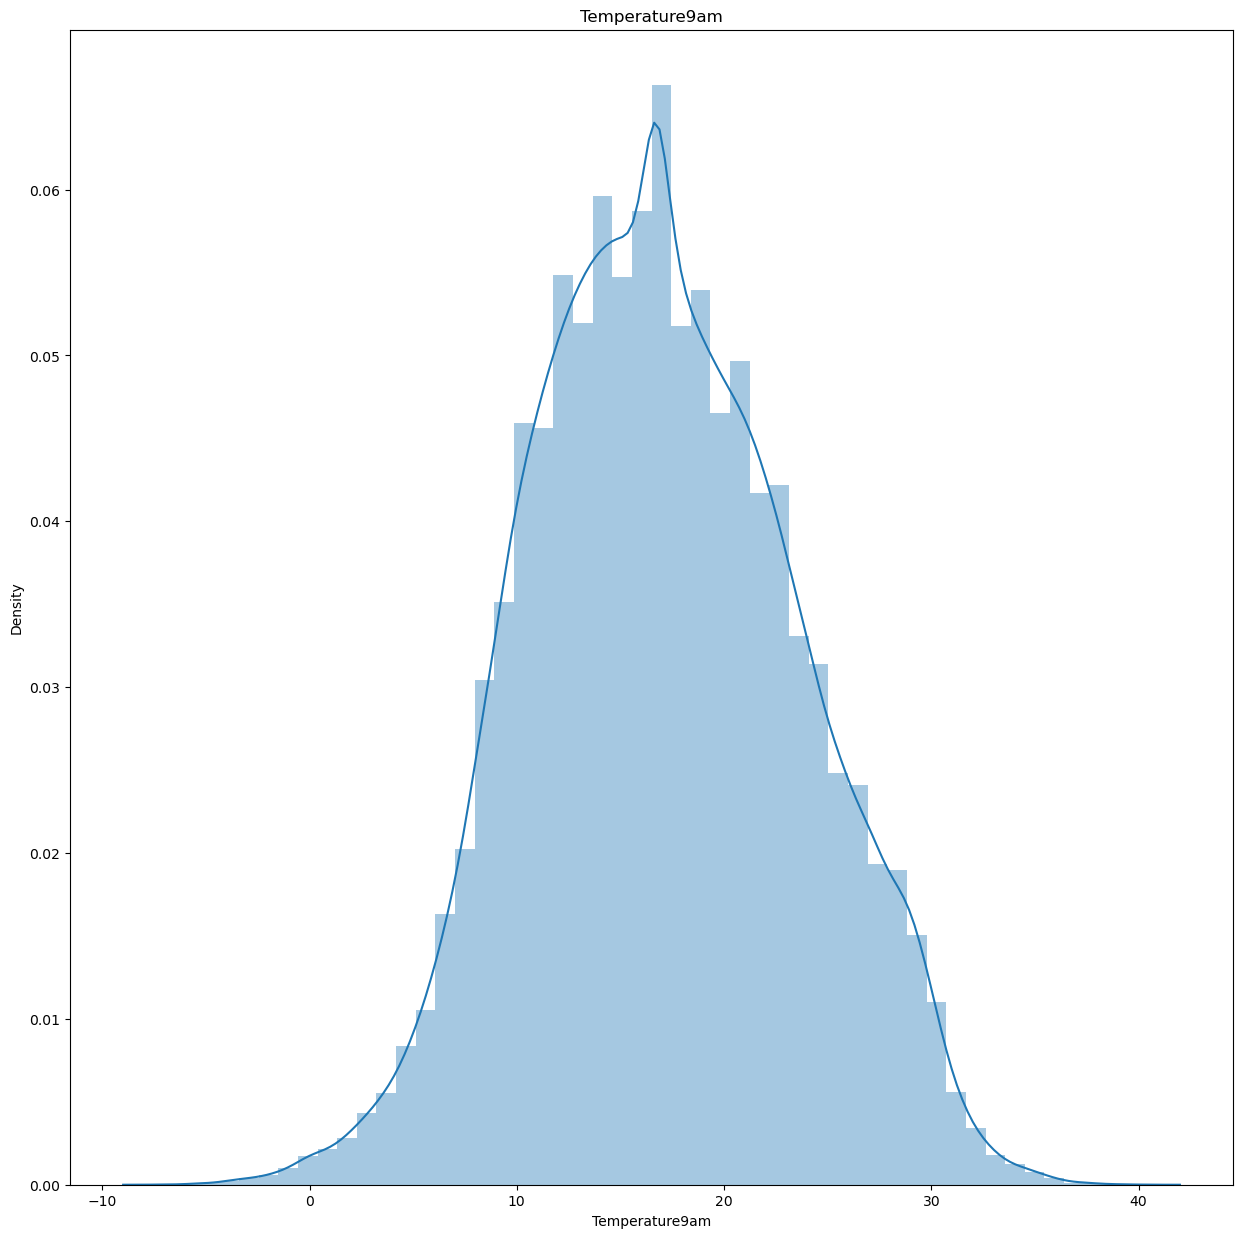

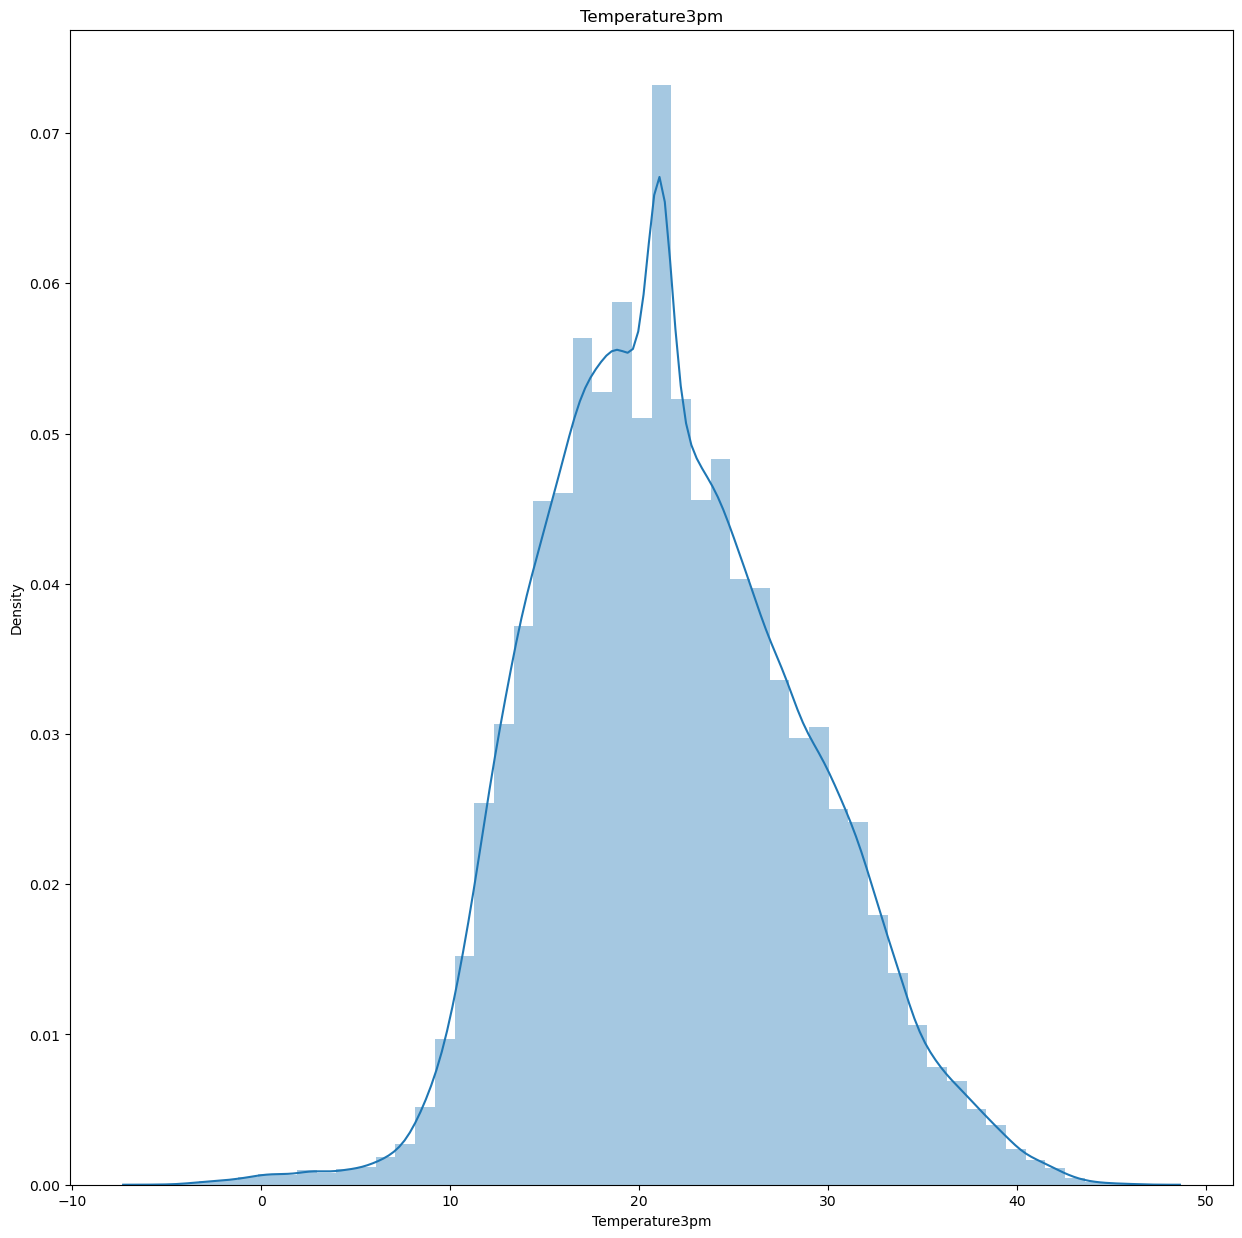

<Figure size 1500x1500 with 0 Axes>

In [38]:
for feature in continuous_data:
    data=cloud_df.copy()
    sns.distplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))
  

In [40]:
for i in continuous_data:
    print(i)

MinimumTemperature
MaximumTemperature
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temperature9am
Temperature3pm


In [48]:
#for minimum temperature
mean_value1=cloud_df['MinimumTemperature'].mean()
std_value1=cloud_df['MinimumTemperature'].std()
print(mean_value1-3*std_value1,mean_value1+3*std_value1)

-6.90528576975097 31.289392740739224
